In [1]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
Added /home/heineike/github/expression_broad_data to path: 
['/home/heineike/github/expression_broad_data/scripts', '', '/home/lab/envs/seqanalysis/lib/python35.zip', '/home/lab/envs/seqanalysis/lib/python3.5', '/home/lab/envs/seqanalysis/lib/python3.5/plat-linux', '/home/lab/envs/seqanalysis/lib/python3.5/lib-dynload', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/argh-0.26.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/glob2-0.4.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/mmtf_python-1.0.2-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/IPython/extensions', '/home/heineike/.ipython', '/home/heineike/github/expression_broad_data']
Importing expression plots and io_library and setting base_dir and data

In [2]:
#Make kl_sc_PKA_data dataframe.  Only need to do once. 
#Compare both species AS +/- drug

# Combine data from both species
#eventually I might want a big database here but for now just going to load what I need. 


#Load KL to SC ortholog mapping

kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")

#Load data for each species and combine desired data into one dataframe per species. 

lfc_data = {}
# rlog_data = {}
# raw_data = {}
comparison_data = {}

species = ['KL', 'SC']
# conditions = ["AS_noNMPP1_YPD_t40", "AS_yesNMPP1_YPD_t40"]
for spec in species: 
    #Load DEseq data for AS +/- drug
    lfc_data_spec = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_' + spec + '_AS_WT_nmpp1.csv'), index_col=0)
    if spec == 'KL':
        kl_genenames = io_library.kl_genename_convert_list(lfc_data_spec.index)
        lfc_data_spec['kl_genename'] = kl_genenames
        lfc_data_spec.set_index('kl_genename',inplace = True)
    lfc_data_spec.index.name = spec.lower() + "_genename"
    
    lfc_data[spec] = lfc_data_spec

    #     fname_rlog_data = data_processing_dir + '20170817_klscpka/20170817_klscpka_avg_rlog_' + spec + '.csv'
    #     rlog_data[spec] = pd.read_csv(fname_rlog_data,index_col = 0)
    #     fname_raw_data = data_processing_dir + '20170817_klscpka/20170817_klscpka_avg_counts_' + spec + '.csv'
    #     raw_data[spec] = pd.read_csv(fname_raw_data,index_col = 0)

    #     #These are the genes that have no rlog value
    #     print('The following ' + str(len(set(lfc_data[spec].index)-set(rlog_data[spec].index))) + ' genes have no rlog data for ' + spec)
    #     print(set(lfc_data[spec].index)-set(rlog_data[spec].index))

    #     #Merge into one dataset
    #     labels_mean = [condition + "_mean" for condition in conditions]
    #     labels_var = [condition + "_var" for condition in conditions]
    #     labels = list(chain.from_iterable([labels_mean,labels_var]))

    #     rlog_subset = rlog_data[spec].loc[:,labels]
    #     rlog_subset.rename(index = str, columns = {label: 'rlog_' + label for label in labels},inplace=True)

    #     raw_subset = raw_data[spec].loc[:,labels]
    #     raw_subset.rename(index = str, columns = {label: 'raw_' + label for label in labels},inplace=True)
    
    comparison_data[spec] =  lfc_data_spec  #pd.concat([lfc_data[spec], rlog_subset , raw_subset],axis = 1)

#Map KL PKA inhibition data onto related SC orthologs
kl_comparison_data_sc_orthologs = kl_orthologs.merge(comparison_data['KL'], left_on='kl_genename', right_index=True, how = 'inner')

#add in SC_common_name to SC data
sc_comparison_data=comparison_data['SC']
sc_comparison_data['SC_common_name']= io_library.SC_common_name_lookup(sc_comparison_data.index)
#Just noticed that IMP2 has a common name IMP2' - should troubleshoot that someday. 

kl_sc_PKA_data = kl_comparison_data_sc_orthologs.merge(sc_comparison_data, on = 'sc_genename', suffixes=('_KL','_SC'), how='inner')

# fname_cross_spec_comparison = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/cross_species_compare_ASminus_ASplus_YPD_20181204.csv")
# kl_sc_PKA_data.to_csv(fname_cross_spec_comparison)


In [27]:
#sc_comparison_data.loc['YGR044C']
sc_comparison_data
sc_comparison_data.loc['YGR088W']

baseMean               4977.14
log2FoldChange         8.69427
lfcSE                 0.326982
stat                   26.5894
pvalue            8.99563e-156
padj              5.17069e-152
SC_common_name            CTT1
Name: YGR088W, dtype: object

In [22]:
kl_comparison_data_sc_orthologs[kl_comparison_data_sc_orthologs['kl_genename']=='KLLA0A02629g']


,N SCer Orthologs,kl_genename,sc_genename,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
810,1,KLLA0A02629g,YGR044C,27.858179,2.900286,0.579313,5.006424,5.545060e-07,0.000002


In [18]:
comparison_data['KL'].loc['KLLA0A02629g']


baseMean          2.785818e+01
log2FoldChange    2.900286e+00
lfcSE             5.793130e-01
stat              5.006424e+00
pvalue            5.545060e-07
padj              2.462549e-06
Name: KLLA0A02629g, dtype: float64

In [25]:
#Load kl_sc_PKA data

fname_cross_spec_comparison = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/cross_species_compare_ASminus_ASplus_YPD_20181204.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)

In [12]:
kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name']=='RME1']

,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,baseMean_SC,log2FoldChange_SC,lfcSE_SC,stat_SC,pvalue_SC,padj_SC,SC_common_name


In [8]:
kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")
kl_orthologs[kl_orthologs['kl_genename']=='KLLA0A02629g']

,N SCer Orthologs,kl_genename,sc_genename
810,1,KLLA0A02629g,YGR044C


In [3]:
#Load Go term data
GO_aspect = 'P'
go_slims_aspect, go_term_list = io_library.load_goslim_data(GO_aspect, go_slim_fname = 'go_slim_mapping_20181204.tab')


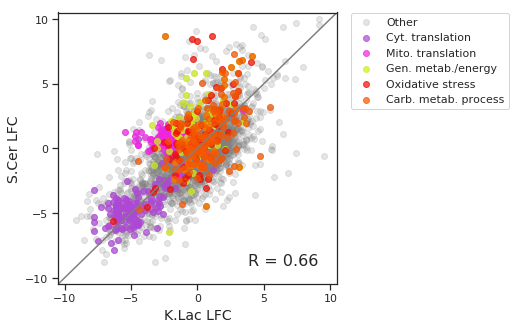

In [14]:
fig, ax = plt.subplots(figsize=(5,5))

#plot y=x line

xmin,xmax = (-10.5,10.5)
ymin,ymax = (-10.5,10.5)

ax.plot([xmin,xmax],[xmin,xmax], color = 'grey')

alpha = 0.7
go_term_subset = OrderedDict([('Cyt. translation', ('cytoplasmic translation','#ae48d6')),
                              ('Mito. translation', ('mitochondrial translation','#ef26e2')),
                              #('Conjugation', ('conjugation','#287ded')),
                              ('Gen. metab./energy', ('generation of precursor metabolites and energy','#d1ed1c')),
                              ('Oxidative stress', ('response to oxidative stress','#f20e02')),
                              ('Carb. metab. process', ('carbohydrate metabolic process','#f45702'))  #f1a501
                              #'Meiotic cell cycle': ('meiotic cell cycle','#0cebf7'),                      
                              #'rRNA processing': ('rRNA processing','#ae48d6')
                             ])
                  
subsets = OrderedDict({'Other': (kl_sc_PKA_data,
                              'gray',0.2)
                     })

for subset_name, (go_term, color) in go_term_subset.items(): 
    go_term_genes = go_slims_aspect[go_slims_aspect['GO_term']==go_term]['sc_genename']
    subset_df = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(go_term_genes)]
    subsets[subset_name] = (subset_df, color, alpha )
    
for subset_name,(subset,color,alpha) in subsets.items():

    ax.scatter(subset['log2FoldChange_KL'], 
               subset['log2FoldChange_SC'],
               color = color, alpha = alpha, label = subset_name)

rval, pval = stats.pearsonr(kl_sc_PKA_data['log2FoldChange_SC'], kl_sc_PKA_data['log2FoldChange_KL'])


ax.text(3.8,-9,'R = {:.2f}'.format(rval),fontdict={'size':16})
ax.set_xlim([xmin,xmax])
ax.set_yticks([-10,-5,0,5,10])
ax.set_ylim([ymin,ymax])
ax.set_xlabel('K.Lac LFC',fontdict={'size':14})
ax.set_ylabel('S.Cer LFC',fontdict={'size':14})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig(os.path.normpath(figsave_dir + "SC_KL_LFC_goterms.svg"))  


In [62]:
np.floor?

In [57]:
15 % 5

0

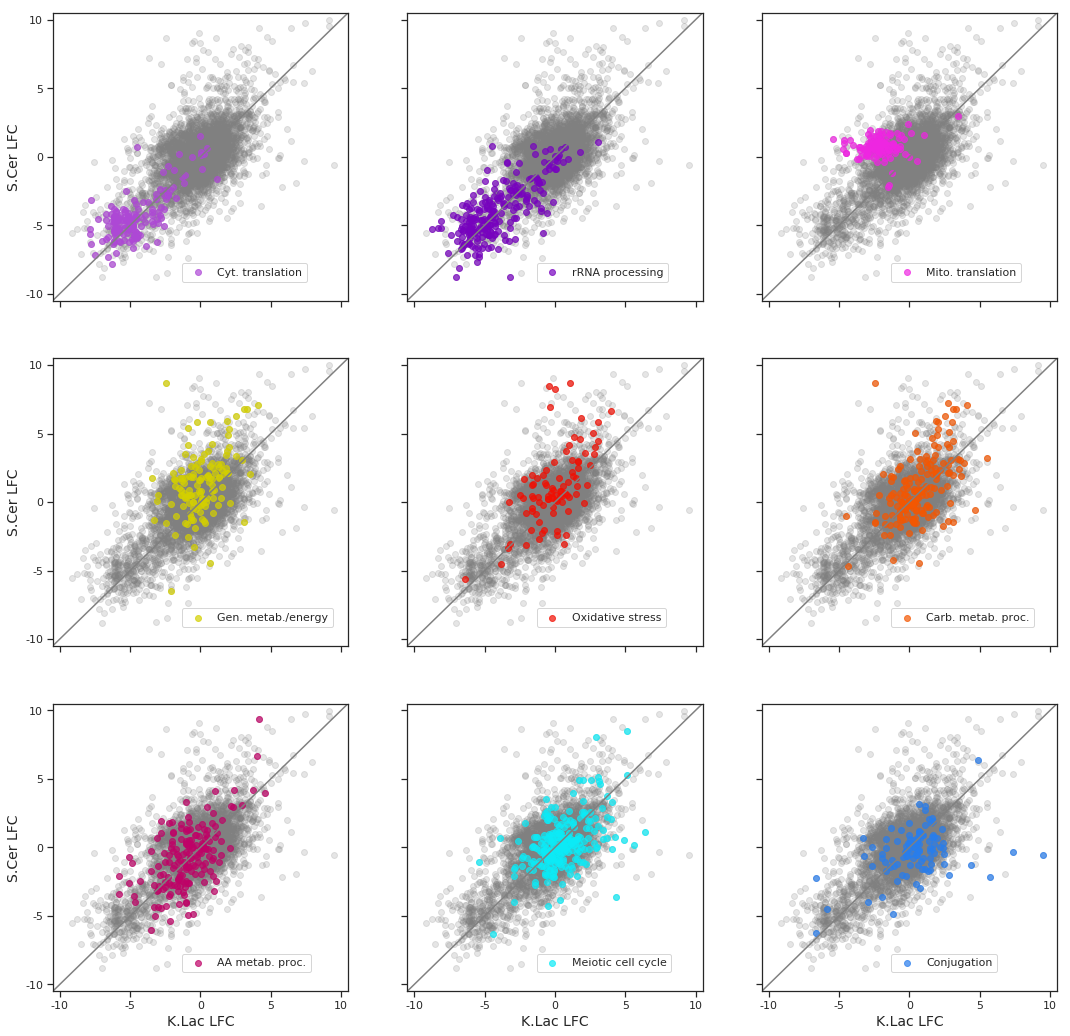

In [82]:
#Make subplots for different subsets
fig, axarr = plt.subplots(3,3,figsize= (18,18))
#plot y=x line

xmin,xmax = (-10.5,10.5)
ymin,ymax = (-10.5,10.5)



alpha = 0.7
go_term_subset = OrderedDict([('Cyt. translation', ('cytoplasmic translation','#ae48d6')),
                              ('rRNA processing', ('rRNA processing','#7702bf')),
                              ('Mito. translation', ('mitochondrial translation','#ef26e2')),
                              ('Gen. metab./energy', ('generation of precursor metabolites and energy','#d4d000')), #d1ed1c
                              ('Oxidative stress', ('response to oxidative stress','#f20e02')),
                              ('Carb. metab. proc.', ('carbohydrate metabolic process','#f45702')),  #f1a501                      
                              ('AA metab. proc.', ('cellular amino acid metabolic process','#bf0267')),
                              ('Meiotic cell cycle', ('meiotic cell cycle','#0cebf7')),
                              ('Conjugation', ('conjugation','#287ded'))
                             ])
                  
bg_subset = kl_sc_PKA_data
bg_color = 'grey'
bg_alpha = 0.2

subsets = OrderedDict()

for subset_name, (go_term, color) in go_term_subset.items(): 
    go_term_genes = go_slims_aspect[go_slims_aspect['GO_term']==go_term]['sc_genename']
    subset_df = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(go_term_genes)]
    subsets[subset_name] = (subset_df, color, alpha )
    
for jj, (subset_name,(subset,color,alpha)) in enumerate(subsets.items()):
    (row,col) = divmod(jj,3)
    ax = axarr[row,col]
    
    ax.scatter(bg_subset['log2FoldChange_KL'], 
               bg_subset['log2FoldChange_SC'],
               color = bg_color, alpha = bg_alpha, label = None)
                                              
    ax.scatter(subset['log2FoldChange_KL'], 
               subset['log2FoldChange_SC'],
               color = color, alpha = alpha, label = subset_name)
    
    ax.plot([xmin,xmax],[xmin,xmax], color = 'grey')

    # rval, pval = stats.pearsonr(kl_sc_PKA_data['log2FoldChange_SC'], kl_sc_PKA_data['log2FoldChange_KL'])
    # ax.text(3.8,-9,'R = {:.2f}'.format(rval),fontdict={'size':16})

    ax.set_xlim([xmin,xmax])
    ax.set_xticks([-10,-5,0,5,10])
    ax.set_yticks([-10,-5,0,5,10])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_ylim([ymin,ymax])
    if row==2: 
        ax.set_xlabel('K.Lac LFC',fontdict={'size':14})
        ax.set_xticklabels([-10,-5,0,5,10])
    if col==0:
        ax.set_ylabel('S.Cer LFC',fontdict={'size':14})
        ax.set_yticklabels([-10,-5,0,5,10])
        
    ax.legend(bbox_to_anchor=(0.42,0.15)) #, loc=2, borderaxespad=0.)

fig.savefig(os.path.normpath(figsave_dir + "SC_KL_LFC_goterms_array.svg"))  


In [47]:
axarr.flatten?

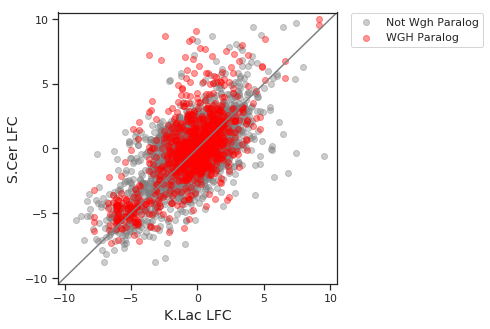

In [18]:
#Shade just orthologs

fig, ax = plt.subplots(figsize=(5,5))

alpha = 0.7  

ax.plot([xmin,xmax],[xmin,xmax], color = 'grey')

subsets = OrderedDict([('Not Wgh Paralog', (1,'gray',0.4)),
                       ('WGH Paralog', (2,'red',0.4))
                      ])


for subset_name, (N_paralogs, color, alpha) in subsets.items(): 
    subset = kl_sc_PKA_data[kl_sc_PKA_data['N SCer Orthologs']==N_paralogs]    

    ax.scatter(subset['log2FoldChange_KL'], 
               subset['log2FoldChange_SC'],
               color = color, alpha = alpha, label = subset_name)

ax.set_xlim([-10.5,10.5])
ax.set_yticks([-10,-5,0,5,10])
ax.set_ylim([-10.5,10.5])
ax.set_xlabel('K.Lac LFC',fontdict={'size':14})
ax.set_ylabel('S.Cer LFC',fontdict={'size':14})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig(os.path.normpath(figsave_dir + "SC_KL_LFC_paralogs_mpl.svg"))  


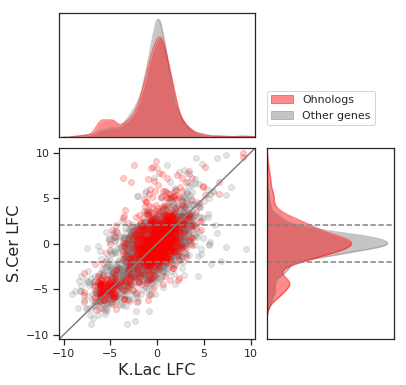

In [84]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(5, 5, hspace=0.2, wspace=0.2)
ax_scatter = fig.add_subplot(grid[2:,0:-2])

xmin,xmax = (-10.5,10.5)
ymin,ymax = (-10.5,10.5)

ax_xhist = fig.add_subplot(grid[0:2,0:-2 ], xticks=[],yticks=[]) #, sharey=ax_scatter)
ax_yhist = fig.add_subplot(grid[2:,-2:], xticks=[],yticks=[]) #, sharex=ax_scatter)

#(N_paralogs, color, alpha, alpha_kde)
subsets = OrderedDict([('Other Genes', (1,'gray',0.2, 0.45)),
                       ('Ohnologs', (2,'red',0.2, 0.45))
                      ])


for subset_name, (N_paralogs, color, alpha, alpha_kde) in subsets.items(): 
    subset = kl_sc_PKA_data[kl_sc_PKA_data['N SCer Orthologs']==N_paralogs]    
    
    ax_scatter.scatter(subset['log2FoldChange_KL'], subset['log2FoldChange_SC'], color=color, alpha=alpha)
    sns.distplot(subset['log2FoldChange_KL'], hist=False, rug=False, ax=ax_xhist, 
                 kde_kws={"color": color, "shade":True,  "label": subset_name, "alpha": alpha_kde}) #"lw": 2,
    sns.distplot(subset['log2FoldChange_SC'], hist=False, rug=False, ax=ax_yhist, 
                 kde_kws={"color": color, "shade":True, "label": subset_name, "alpha":alpha_kde}, vertical=True) #"lw": 2, 
    #ax_yhist.invert_xaxis()
#sns.jointplot(x = subset['log2FoldChange_KL'] , y = subset['log2FoldChange_SC'], kind='kde', color = color, ax = ax)
#     sns.distplot(subset['log2FoldChange_SC'], hist=False, rug=False, ax=ax, 
#                  kde_kws={"color": color, "shade":True, "lw": 2, "label": subset_name})
  
    
ax_scatter.set_xlim([xmin, xmax])
ax_scatter.set_ylim([ymin, ymax])
ax_yhist.set_ylim([ymin, ymax])
ax_xhist.set_xlim([xmin, xmax])


ax_scatter.set_xlabel('K.Lac LFC',fontdict={'size':16})
ax_scatter.set_ylabel('S.Cer LFC',fontdict={'size':16})


lfc_thresh_act = 2.0
lfc_thresh_rep = -2.0
ax_scatter.plot([xmin,xmax],[ymin,ymax], color = 'grey')
ax_scatter.plot([xmin,xmax],[lfc_thresh_act,lfc_thresh_act], color = 'grey', linestyle = 'dashed')
ax_scatter.plot([xmin,xmax],[lfc_thresh_rep,lfc_thresh_rep], color = 'grey', linestyle = 'dashed')


legend_elements = [#Line2D([0], [0], color='b', lw=4, label='Line'),
                   #Line2D([0], [0], marker='o', color='w', label='Scatter',
                   #       markerfacecolor='g', markersize=15),
                   Patch(facecolor='red', alpha =0.45,  edgecolor='red',
                         label='Ohnologs'), 
                   Patch(facecolor='grey', alpha = 0.45, edgecolor='grey',
                         label='Other genes') 
#                    Patch(facecolor=act_rep_color, edgecolor=act_rep_color,
#                          label='One ohnolog activated, one ohnolog repressed'), 
#                    Patch(facecolor=no_eff_color, edgecolor=no_eff_color,
#                          label='Not effected by PKA inhibition'), 
#                    Patch(fill=False, edgecolor= 'grey', hatch = '///',
#                          label='$DE_{PKA}$') 
                    ]

#ax.legend(bbox_to_anchor=(1.05,1.0))
ax_yhist.legend(handles=legend_elements, bbox_to_anchor=(0.0, 1.3), loc=2, borderaxespad= 0.) #, loc='center')


#ax_yhist.legend(bbox_to_anchor=(0.0, 1.3), loc=2, borderaxespad=0.)
kl_legend = ax_xhist.legend()
kl_legend.remove()
ax_xhist.set_xlabel('')
ax_yhist.set_ylabel('')

(xmin_yhist,xmax_yhist) = ax_yhist.get_xlim()
ax_yhist.plot([xmin_yhist,xmax_yhist],[lfc_thresh_act,lfc_thresh_act], color = 'grey', linestyle = 'dashed')
ax_yhist.plot([xmin_yhist,xmax_yhist],[lfc_thresh_rep,lfc_thresh_rep], color = 'grey', linestyle = 'dashed')
ax_yhist.set_xlim(xmin_yhist,xmax_yhist)  #if you don't do this it adds on margins

#ax.set_xlabel('S.Cer LFC')

fig.savefig(os.path.normpath(figsave_dir + "SC_KL_LFC_paralogs_margdists.svg"))  


    

In [5]:
#Plot LFC for SC and KL on the same axis



data = []

xlabel = 'LFC: K.lac AS -/+ 3uM 1-NM-PP1'
ylabel = 'LFC: S.Cer AS -/+ 3uM 1-NM-PP1'

wgh_n_orthologs = {'Not WGH Paralog':1, 'WGH Paralog':2}
wgh_color = {'WGH Paralog':'red', 'Not WGH Paralog':'gray'}

#Calculate R for all the data
rval, pval = stats.pearsonr(kl_sc_PKA_data['log2FoldChange_SC'], kl_sc_PKA_data['log2FoldChange_KL'])

for geneset in wgh_n_orthologs.keys():
    
    kl_sc_PKA_data_subset = kl_sc_PKA_data[kl_sc_PKA_data['N SCer Orthologs']==wgh_n_orthologs[geneset]]
    
    trace = pygo.Scatter(
                x = kl_sc_PKA_data_subset['log2FoldChange_KL'], 
                y =  kl_sc_PKA_data_subset['log2FoldChange_SC'],
                text = kl_sc_PKA_data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': 0.4,  
                          'color': wgh_color[geneset],
                          'size': 10}, 
                name = geneset
            )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }, 
    height = 600,
    width = 640,
    annotations=[
        dict(
            x=-7.0,
            y=7.0,
#             xref='x',
#             yref='y',
            text='<b>R = {:.2f}</b>'.format(rval),
            showarrow=False 
            #fontsize = 14
#            arrowhead=7,
#            ax=0,
#            ay=-40
        )
    ]
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'AS_pmNMPP1_kl_v_sc')

pio.write_image(fig, os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/LFC_compare.svg'))


Figure [x]: : We collected RNA Sequencing data after inhibiting PKA in S.Cer and K.Lac PKA(AS) mutants growing in YPD containing 3uM 1-NMPP1 after 50min.  Estimated log2 fold change (LFC) values using DESEQ2 [3] are shown for all orthologous genes.  Red shading indicates a gene that has a WGH paralog in S.Cer.  

In [27]:
kl_sc_PKA_data.loc[kl_sc_PKA_data['SC_common_name']=='YCL048W-A',:]

,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,baseMean_SC,log2FoldChange_SC,lfcSE_SC,stat_SC,pvalue_SC,padj_SC,SC_common_name
4463,2,KLLA0C00957g,YCL048W-A,1335.975339,-0.932691,0.309348,-3.015022,0.00257,0.006442,11.836791,7.098852,1.35298,5.246827,1.547408e-07,7.747821e-07,YCL048W-A


## Calculate enrichment for ohnologs in the various activation sets. 

In [91]:
#Load Ortholog data
ohnologs = pd.read_csv(data_processing_dir + os.path.normpath("ortholog_files_YGOB/ohnologs.csv"), index_col=0)
print('Total number of Ohnologs: ' + str(len(ohnologs)))


#Load PKA activation sets in both species
fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181204_klsc_pkainh_subsets_for_enrichment.pkl')

with open(fname, 'rb') as file:
    [gene_sets, background_genes, background_map] = pickle.load(file)

#combine sc_only and klsc sets to get all activated and repressed genes in SC
gene_sets['sc_act']=(gene_sets['sc_only_act'] | gene_sets['klsc_act'])
background_map['sc_act'] = 'SC'
gene_sets['sc_rep']=(gene_sets['sc_only_rep'] | gene_sets['klsc_rep'])
background_map['sc_rep'] = 'SC'
gene_sets['sc_no_change'] = (background_genes['SC']-(gene_sets['sc_act'] | gene_sets['sc_rep']))
background_map['sc_no_change'] = 'SC'


Total number of Ohnologs: 547


In [93]:
print(len(gene_sets['sc_no_change']))
print(len(gene_sets['sc_act']))
print(len(gene_sets['sc_rep']))
print(len(background_genes['SC']))
5751-509-697

4545
509
697
5751


4545

In [94]:
#Enrichment for ohnologs

all_ohnologs = set(list(ohnologs['Gene 1']) + list(ohnologs['Gene 2']))

output = {}
#output_order = (N subset genes ohnologs, p-value, pct ohnologs in subset, pct ohnologs in background, pct of all ohnologs)
for gene_set_name, gene_set in gene_sets.items(): 
    background_set = background_genes[background_map[gene_set_name]]
    
    N_subset_genes_ohnologs = len(gene_set & all_ohnologs)
    N_subset_genes_not_ohnologs = len(gene_set)-N_subset_genes_ohnologs
    N_bg_genes_ohnologs = len(background_set & all_ohnologs)
    N_bg_genes_not_ohnologs = len(background_set)-N_bg_genes_ohnologs
    
    oddsratio, pvalue = stats.fisher_exact([[N_subset_genes_ohnologs, N_bg_genes_ohnologs], [N_subset_genes_not_ohnologs, N_bg_genes_not_ohnologs]],alternative = 'greater')
    
    output[gene_set_name] = (N_subset_genes_ohnologs, 
                             pvalue, 
                             N_subset_genes_ohnologs/(len(gene_set)), 
                             N_bg_genes_ohnologs/(len(background_set)), 
                             N_subset_genes_ohnologs/N_bg_genes_ohnologs)

ohnolog_enrichment = pd.DataFrame.from_dict(output, orient='index', 
                       columns = ["N subset genes that are ohnologs", 
                                  "P-value", 
                                  "pct ohnologs in subset", 
                                  "pct ohnologs in background", 
                                  "pct of all ohnologs from subset"]
                      )

fname = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/ohnolog_enrichment_20190814.csv")
ohnolog_enrichment.to_csv(fname)

In [95]:
ohnolog_enrichment

,N subset genes that are ohnologs,P-value,pct ohnologs in subset,pct ohnologs in background,pct of all ohnologs from subset
klsc_rep,126,1.552398e-04,0.286364,0.209208,0.121622
sc_act,155,2.669256e-10,0.304519,0.183968,0.146503
sc_only_act,121,1.562286e-11,0.337989,0.183968,0.114367
sc_only_rep,53,2.054199e-01,0.206226,0.183968,0.050095
kl_only_act,36,7.367410e-01,0.192513,0.209208,0.034749
sc_no_change,724,9.995499e-01,0.159296,0.183968,0.684310
klsc_act,34,3.487244e-01,0.225166,0.209208,0.032819
sc_rep,179,4.879641e-06,0.256815,0.183968,0.169187
kl_only_rep,48,8.489509e-01,0.184615,0.209208,0.046332


In [18]:
# #Load PKA targets for both species (from go_enrichment script)
# fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181204_klsc_pkainh_subsets_for_enrichment.pkl'

# with open(fname, 'rb') as file:
#     [gene_sets, background_genes, background_map] = pickle.load(file)
  


In [28]:
# for gene_set_name, gene_set in gene_sets.items(): 
#     print(gene_set_name)
#     subset_genes = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(gene_set)]
#     subset_genes_w_paralog = subset_genes[subset_genes['N SCer Orthologs']==2]

#     N_subset_genes = len(subset_genes)
#     N_subset_genes_w_paralog = len(subset_genes_w_paralog)
#     N_subset_genes_no_paralog = N_subset_genes - N_subset_genes_w_paralog


#     N_bg_genes = len(kl_sc_PKA_data)
#     bg_genes_w_paralog = kl_sc_PKA_data[kl_sc_PKA_data['N SCer Orthologs'] == 2]
#     N_bg_genes_w_paralog = len(bg_genes_w_paralog)
#     N_bg_genes_no_paralog = N_bg_genes - len(bg_genes_w_paralog)



#     oddsratio, pvalue = stats.fisher_exact([[N_subset_genes_w_paralog, N_bg_genes_w_paralog], [N_subset_genes_no_paralog, N_bg_genes_no_paralog]],alternative = 'greater')
#     print(oddsratio)
#     print(pvalue)

Older statement: 
Statement[paralog_enrichment] In the group of genes that were activated by S.Cerevisiae only, ohnologs were enriched (pvalue=1.02e-15, Fisher's exact test) and they were not enriched in the genes that were activated only in K.Lactis (pvalue = 0.55) or in both species (pvalue = 0.34).   Paralogs were enriched in genes that were repressed in both species as well (pvalue = 1.42e-4) but not in genes repressed under pka inhibition in a species specific manner (pvalue = 0.83, 0.38 for K.Lac and S.Cer respectively) 

## Count numbers of activated / repressed genes

In [178]:
target_sets_dict = {}
for spec in ['KL', 'SC']: 
    fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181203_r1g1_m24_pka_targets_' + spec + '.pkl')
    
    with open(fname, 'rb') as file:
        target_sets_dict[spec] = pickle.load(file)

In [3]:
fname_cross_spec_comparison = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/cross_species_compare_ASminus_ASplus_YPD_20181204.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)

In [48]:
kl_sc_PKA_data.columns

Index(['N SCer Orthologs', 'kl_genename', 'sc_genename', 'baseMean_KL',
       'log2FoldChange_KL', 'lfcSE_KL', 'stat_KL', 'pvalue_KL', 'padj_KL',
       'baseMean_SC', 'log2FoldChange_SC', 'lfcSE_SC', 'stat_SC', 'pvalue_SC',
       'padj_SC', 'SC_common_name'],
      dtype='object')

In [54]:
print("Total number of annotated genes from length of rows in 2018_countdata_SC/KL.")
print("SC: 6601")
print("KL: 5535")
for spec in ['SC','KL']:
    for target_set_name in ['pkainh_act', 'pkainh_rep']: 
        print("Species: {}.  Total number of genes in {}:  {}".format(spec, target_set_name, str(len(target_sets_dict[spec][0][target_set_name]))))
    
print("Total number of genes with orthologs in both species " + str(len(kl_sc_PKA_data)))
for spec in ['SC','KL']:
    for target_set_name in ['pkainh_act', 'pkainh_rep']: 
        target_set = target_sets_dict[spec][0][target_set_name]
        target_set_sc_kl = target_set & set(kl_sc_PKA_data[spec.lower() + '_genename'])
        print("Species: {}.  Total number of genes in {}:  {}".format(spec, target_set_name, str(len(target_set_sc_kl))))



Total number of annotated genes from length of rows in 2018_countdata_SC/KL.
SC: 6601
KL: 5535
Species: SC.  Total number of genes in pkainh_act:  509
Species: SC.  Total number of genes in pkainh_rep:  697
Species: KL.  Total number of genes in pkainh_act:  426
Species: KL.  Total number of genes in pkainh_rep:  660
Total number of genes with orthologs in both species 4793
Species: SC.  Total number of genes in pkainh_act:  397
Species: SC.  Total number of genes in pkainh_rep:  640
Species: KL.  Total number of genes in pkainh_act:  290
Species: KL.  Total number of genes in pkainh_rep:  599


In [169]:
#Count number of orthologs activated and repressed
#Load GOI ohnolog data

fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20190814.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

#Merge with kl_orthologs set
#Load KL ortholog data
kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")
ohnologs_expression_sorted_klorth = ohnologs_expression_sorted.merge(kl_orthologs, how='inner', left_on='sc_genename_low',right_on='sc_genename')

#merege in KL LFC Data
lfc_data_KL = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_KL_AS_WT_nmpp1.csv'), index_col=0)
kl_genenames = io_library.kl_genename_convert_list(lfc_data_KL.index)
lfc_data_KL['kl_genename'] = kl_genenames
lfc_data_KL.set_index('kl_genename',inplace = True)
lfc_data_KL.index.name = spec.lower() + "_genename"
lfc_data_KL.rename(columns={column:column+'_KL' for column in lfc_data_KL.columns}, inplace=True)

ohnologs_expression_sorted_klorth = ohnologs_expression_sorted_klorth.merge(lfc_data_KL,left_on='kl_genename',right_index=True,  how='inner')

In [33]:
#Counts of activated and repressed ohnologs in comparison with KL using initial Activation/Repression thresholds.

#using loaded target sets
for act_rep, level, opp_level in [('act','high','low'),('rep','low','high')]:
    all_targets_SC = target_sets_dict['SC'][0]['pkainh_' + act_rep]
    all_targets_KL = target_sets_dict['KL'][0]['pkainh_' + act_rep]
    target_ohnologs = ohnologs_expression_sorted_klorth[ohnologs_expression_sorted_klorth['sc_genename_'+level].isin(all_targets_SC)]
    target_ohnologs_similar_exp = target_ohnologs[target_ohnologs['sc_genename_' + opp_level].isin(all_targets_SC)]
    target_ohnologs_KL = target_ohnologs[target_ohnologs['kl_genename'].isin(all_targets_KL)]
    print(("{} total ohnologs pairs with at least one gene {} by PKA inhibition. \n" + 
          "{} ohnolog pairs with both genes {} by PKA inhibition. \n" + 
          "{} ohnolog pairs with KL ortholog also {} by PKA inhibition").format(len(target_ohnologs),
                                                                       act_rep, 
                                                                       len(target_ohnologs_similar_exp), 
                                                                       act_rep, 
                                                                       len(target_ohnologs_KL),
                                                                       act_rep)
         )


#target_sets_dict['SC'][0]['pkainh_rep']

120 total ohnologs pairs with at least one gene act by PKA inhibition. 
20 ohnolog pairs with both genes act by PKA inhibition. 
23 ohnolog pairs with KL ortholog also act by PKA inhibition
114 total ohnologs pairs with at least one gene rep by PKA inhibition. 
56 ohnolog pairs with both genes rep by PKA inhibition. 
70 ohnolog pairs with KL ortholog also rep by PKA inhibition


In [170]:
#Counts of activated and repressed ohnologs in comparison with KL using DEpka activation/repression thresholds. 

#thresholds: LFC, pvalue
threshs = {'act': (2.0,1.0,-1.5,'high'), 'rep': (-2.0,-1.0,-1.5,'low')}

one_ohnolog = {}
one_ohnolog_pval= {}
one_ohnolog_klorth = {}
one_ohnolog_klorth_pval = {}

for act_rep in ['act','rep']: 
    (thresh,mult, pval_thresh , level) = threshs[act_rep]
    one_ohnolog[act_rep] = ohnologs_expression_sorted_klorth[(mult*ohnologs_expression_sorted_klorth['log2FoldChange_' + level])>(mult*thresh)]
    print("Total Ohnolog pairs w/ at least one {}: {}".format(act_rep,len(one_ohnolog[act_rep])))
    one_ohnolog_pval[act_rep] = one_ohnolog[act_rep][np.log10(one_ohnolog[act_rep]['pvalue_'+level])<pval_thresh]
    print("Total Ohnolog pairs w/ at least one {}, and pval thresh met: {}".format(act_rep,len(one_ohnolog_pval[act_rep])))
    one_ohnolog_klorth[act_rep] = one_ohnolog_pval[act_rep][(mult*one_ohnolog_pval[act_rep]['log2FoldChange_KL'])>(mult*thresh)]
    one_ohnolog_klorth_pval[act_rep] = one_ohnolog_klorth[act_rep][np.log10(one_ohnolog_klorth[act_rep]['pvalue_KL'])<pval_thresh]
    print("Total Ohnolog pairs w/ at least one {}, and kl orth also {}, (pval thresh met): {}".format(act_rep,act_rep, len(one_ohnolog_klorth_pval[act_rep])))
    #     both_ohnologs[level] = one_ohnolog[level][(mult*one_ohnolog[level]['log2FoldChange_'+ opposite])>(mult*thresh)]
#     print("Total Ohnolog pairs w/ both {}: {}".format(level,len(both_ohnologs[level])))
#     both_ohnologs_pval1 = one_ohnolog_pval[level][(mult*one_ohnolog_pval[level]['log2FoldChange_'+ opposite])>(mult*thresh)]
#     both_ohnologs_pval[level] = both_ohnologs_pval1[np.log10(both_ohnologs_pval1['pvalue_'+opposite])<pval_thresh]
#     print("Total Ohnolog pairs w/ both {}: {}, and pval thresh met".format(level,len(both_ohnologs_pval[level])))

#get ohnolog data for S.Cer and K.Lac

#ohnologs_expression_sorted_klorth



Total Ohnolog pairs w/ at least one act: 142
Total Ohnolog pairs w/ at least one act, and pval thresh met: 138
Total Ohnolog pairs w/ at least one act, and kl orth also act, (pval thresh met): 28
Total Ohnolog pairs w/ at least one rep: 128
Total Ohnolog pairs w/ at least one rep, and pval thresh met: 122
Total Ohnolog pairs w/ at least one rep, and kl orth also rep, (pval thresh met): 77


In [69]:
one_ohnolog_pval[act_rep]['log2FoldChange_KL']

,Ancestor,AA %id,Length Ratio,sc_genename_low,SC_common_name_low,log2FoldChange_low,pvalue_low,AS_WT_drug_mean_low,AS_WT_drug_var_low,AS_WT_cont_mean_low,...,AS_WT_cont_var_high,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL
0,Anc_1.15,25%,0.73,YDR528W,HLR1,-2.688830,4.911432e-03,1.994522,0.127630,3.339906,...,0.029651,2,KLLA0C00803g,YDR528W,63.394365,-0.066498,0.404882,-0.164240,8.695419e-01,9.106199e-01
2,Anc_1.22,48%,0.84,YDR524C-B,YDR524C-B,-2.265164,4.594696e-15,9.657054,0.046498,11.454176,...,0.012050,2,KLLA0C00957g,YDR524C-B,1335.975339,-0.932691,0.309348,-3.015022,2.569610e-03,6.441758e-03
4,Anc_1.36,25%,0.97,YCL037C,SRO9,-4.773226,3.193271e-11,2.713615,0.016408,5.619247,...,0.019817,2,KLLA0C01210g,YCL037C,37.081505,-5.023298,0.689442,-7.286031,3.192192e-13,2.826119e-12
5,Anc_1.37,37%,0.85,YCL036W,GFD2,-3.719300,2.556638e-26,4.844322,0.036250,7.720217,...,0.247237,2,KLLA0C01254g,YCL036W,59.783782,-0.713002,0.356005,-2.002788,4.520004e-02,8.076535e-02
7,Anc_1.50,67%,0.95,YDR508C,GNP1,-2.142715,3.769031e-12,7.716064,0.018154,9.391980,...,0.012734,2,KLLA0C01606g,YDR508C,143.094472,-1.824959,0.339580,-5.374157,7.694200e-08,3.812357e-07
9,Anc_1.58,91%,0.99,YLR180W,SAM1,-3.184584,1.089711e-16,6.386344,0.171553,8.898864,...,0.287742,2,KLLA0C01782g,YLR180W,745.427049,-3.090838,0.347908,-8.884061,6.446263e-19,9.537209e-18
11,Anc_1.62,93%,1.00,YLR185W,RPL37A,-5.051542,6.929487e-19,7.415808,0.585122,11.413507,...,2.652549,2,KLLA0C01870g,YLR185W,5132.479564,-4.248513,0.330468,-12.856058,7.953057e-38,4.188875e-36
15,Anc_1.136,69%,0.95,YJL198W,PHO90,-3.196344,7.885355e-20,6.833981,0.021976,9.306035,...,0.191936,2,KLLA0C03454g,YJL198W,283.027138,-2.077206,0.313915,-6.617108,3.662931e-11,2.653735e-10
16,Anc_1.140,55%,0.89,YCR034W,FEN1,-3.038190,1.024935e-14,5.463364,0.093550,7.784543,...,0.095426,2,KLLA0C03542g,YCR034W,458.925511,-0.904881,0.368571,-2.455108,1.408424e-02,2.896591e-02
17,Anc_1.146,97%,0.99,YJL191W,RPS14B,-4.544054,5.943720e-49,5.873319,0.033085,9.370823,...,0.022858,2,KLLA0B07623g,YJL191W,4919.984470,-6.069428,0.364079,-16.670618,2.143657e-62,4.181720e-60


In [56]:
lfc_data_KL.rename(columns={column:column+'_KL' for column in lfc_data_KL.columns})

,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL
sc_genename,,,,,,
KLLA0F07865g,1860.450107,-6.712656,0.310417,-21.624636,1.053450e-103,5.548519e-100
KLLA0F16511g,4849.903416,-6.177243,0.293051,-21.079096,1.237235e-98,3.258258e-95
KLLA0F09812g,2581.969140,-6.319922,0.318801,-19.824056,1.846121e-87,3.241173e-84
KLLA0E00573g,5348.644521,-6.152352,0.312008,-19.718561,1.494193e-86,1.967479e-83
KLLA0C18216g,2480.029881,-7.287174,0.372553,-19.560083,3.385240e-85,3.566012e-82
KLLA0F25542g,10248.922072,-6.303665,0.323422,-19.490542,1.320751e-84,1.159400e-81
KLLA0F04675g,4944.507613,-5.946767,0.305608,-19.458795,2.454876e-84,1.847119e-81
KLLA0B08173g,1027.791128,-6.155644,0.330752,-18.611074,2.613260e-77,1.720505e-74
KLLA0D07832g,5590.744808,-6.114816,0.329786,-18.541793,9.500027e-77,5.559627e-74


In [42]:
len(ohnologs_expression_sorted_klorth)

491

In [58]:
ohnologs_expression_sorted_klorth.merge(lfc_data_KL,left_on='kl_genename',right_index=True,  how='inner')

,Ancestor,AA %id,Length Ratio,sc_genename_low,SC_common_name_low,log2FoldChange_low,pvalue_low,AS_WT_drug_mean_low,AS_WT_drug_var_low,AS_WT_cont_mean_low,...,AS_WT_cont_var_high,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL
0,Anc_1.15,25%,0.73,YDR528W,HLR1,-2.688830,4.911432e-03,1.994522,0.127630,3.339906,...,0.029651,2,KLLA0C00803g,YDR528W,63.394365,-0.066498,0.404882,-0.164240,8.695419e-01,9.106199e-01
1,Anc_1.17,60%,0.99,YCL050C,APA1,-0.380157,3.462158e-01,6.572840,0.032160,6.794269,...,0.016999,2,KLLA0C00847g,YCL050C,834.836754,1.205884,0.273694,4.405953,1.053197e-05,3.942566e-05
2,Anc_1.22,48%,0.84,YDR524C-B,YDR524C-B,-2.265164,4.594696e-15,9.657054,0.046498,11.454176,...,0.012050,2,KLLA0C00957g,YDR524C-B,1335.975339,-0.932691,0.309348,-3.015022,2.569610e-03,6.441758e-03
3,Anc_1.25,42%,0.92,YDR522C,SPS2,0.673881,7.793816e-01,-0.258438,0.131374,-0.418910,...,0.362295,2,KLLA0C01001g,YDR522C,25.332437,3.709282,0.691155,5.366784,8.015307e-08,3.964002e-07
4,Anc_1.36,25%,0.97,YCL037C,SRO9,-4.773226,3.193271e-11,2.713615,0.016408,5.619247,...,0.019817,2,KLLA0C01210g,YCL037C,37.081505,-5.023298,0.689442,-7.286031,3.192192e-13,2.826119e-12
5,Anc_1.37,37%,0.85,YCL036W,GFD2,-3.719300,2.556638e-26,4.844322,0.036250,7.720217,...,0.247237,2,KLLA0C01254g,YCL036W,59.783782,-0.713002,0.356005,-2.002788,4.520004e-02,8.076535e-02
6,Anc_1.38,62%,0.77,YDR513W,GRX2,2.925292,8.915149e-04,4.965992,1.145054,2.497538,...,0.023396,2,KLLA0C01298g,YDR513W,5973.905294,1.617933,0.343876,4.704991,2.538767e-06,1.036565e-05
7,Anc_1.50,67%,0.95,YDR508C,GNP1,-2.142715,3.769031e-12,7.716064,0.018154,9.391980,...,0.012734,2,KLLA0C01606g,YDR508C,143.094472,-1.824959,0.339580,-5.374157,7.694200e-08,3.812357e-07
8,Anc_1.52,47%,0.91,YDR507C,GIN4,-1.857336,7.369332e-09,6.910898,0.069999,8.381690,...,0.031505,2,KLLA0C01650g,YDR507C,83.571668,-1.299603,0.384926,-3.376245,7.348248e-04,2.054311e-03
9,Anc_1.58,91%,0.99,YLR180W,SAM1,-3.184584,1.089711e-16,6.386344,0.171553,8.898864,...,0.287742,2,KLLA0C01782g,YLR180W,745.427049,-3.090838,0.347908,-8.884061,6.446263e-19,9.537209e-18


In [171]:
lfc_data_KL

,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL
sc_genename,,,,,,
KLLA0F07865g,1860.450107,-6.712656,0.310417,-21.624636,1.053450e-103,5.548519e-100
KLLA0F16511g,4849.903416,-6.177243,0.293051,-21.079096,1.237235e-98,3.258258e-95
KLLA0F09812g,2581.969140,-6.319922,0.318801,-19.824056,1.846121e-87,3.241173e-84
KLLA0E00573g,5348.644521,-6.152352,0.312008,-19.718561,1.494193e-86,1.967479e-83
KLLA0C18216g,2480.029881,-7.287174,0.372553,-19.560083,3.385240e-85,3.566012e-82
KLLA0F25542g,10248.922072,-6.303665,0.323422,-19.490542,1.320751e-84,1.159400e-81
KLLA0F04675g,4944.507613,-5.946767,0.305608,-19.458795,2.454876e-84,1.847119e-81
KLLA0B08173g,1027.791128,-6.155644,0.330752,-18.611074,2.613260e-77,1.720505e-74
KLLA0D07832g,5590.744808,-6.114816,0.329786,-18.541793,9.500027e-77,5.559627e-74


In [193]:
ohnologs_expression_sorted[(((ohnologs_expression_sorted['act_rep_DEpka_low']=='rep') & (ohnologs_expression_sorted['act_rep_FigS2_low']!='rep')))].T

Ancestor,Anc_1.157,Anc_1.422,Anc_1.446,Anc_3.60,Anc_3.105,Anc_3.475,Anc_4.100,Anc_5.716,Anc_6.157,Anc_6.317,Anc_7.48,Anc_8.772
AA %id,23%,78%,95%,50%,59%,77%,30%,38%,63%,47%,17%,56%
Length Ratio,0.82,0.96,0.93,0.78,0.96,0.99,0.89,0.58,0.9,0.95,0.84,0.97
sc_genename_low,YJR030C,YCR005C,YEL017C-A,YNL298W,YOL092W,YPR138C,YBL009W,YIL158W,YBR242W,YNR019W,YOR342C,YOR299W
log2FoldChange_low,-2.41269,-2.0616,-2.30266,-2.18039,-2.05703,-2.03568,-2.04518,-2.00464,-2.05054,-2.07872,-2.25256,-2.25612
pvalue_low,0.00567594,6.84096e-05,0.000172198,8.49423e-09,5.36509e-06,2.45635e-06,3.37679e-09,5.99309e-06,2.73043e-10,6.25773e-07,1.35511e-06,4.26907e-06
AS_WT_drug_mean_low,2.04066,4.33182,9.20583,4.83882,6.82286,5.26166,5.11753,5.93914,6.80681,5.11766,5.66735,4.71108
AS_WT_drug_var_low,0.103548,0.181492,0.271181,0.0396836,0.167644,0.23258,0.0108354,0.0433347,0.0670147,0.17491,0.281498,0.184612
AS_WT_cont_mean_low,3.3371,5.81821,10.7522,6.48915,8.40127,6.84605,6.68673,7.40074,8.44011,6.71935,7.43761,6.40195
AS_WT_cont_var_low,0.0724453,0.248304,1.35516,0.0258855,0.416939,0.105559,0.0144952,0.35741,0.0243115,0.0306364,0.190768,0.267402
sc_genename_high,YJL181W,YNR001C,YCR024C-A,YOL113W,YBR147W,YGR121C,YGL021W,YKR100C,YGL101W,YCR048W,YAL037W,YMR237W


### Make tidy table for inclusion in supplementary data

In [252]:
#Make tidy table for inclusion in supplementary data

#Load ohnologs_expression_sorted data
#Load ohnologs_goi data
fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20190814.pkl')
with open(fname, 'rb') as file:
    ohnologs_goi,ohnologs_expression_sorted,goi_criteria = pickle.load(file)
# #this older set didn't have the index as ancestor
# ohnologs_goi.set_index('Ancestor', inplace=True)

#Load ohnologs_goi_rep data
fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_rep_20190812.pkl')
with open(fname, 'rb') as file:
    ohnologs_goi_rep,ohnologs_expression_sorted,goi_criteria_rep = pickle.load(file)

#Load Figure S2 activation/repression data
target_sets_dict = {}
for spec in ['KL', 'SC']: 
    fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181203_r1g1_m24_pka_targets_' + spec + '.pkl')
    
    with open(fname, 'rb') as file:
        target_sets_dict[spec] = pickle.load(file)
    
#add columns for DEpka_act and DEpka_rep
depka_act = []
depka_rep = []
for item in ohnologs_expression_sorted.index: 
    depka_act_val = False
    if item in ohnologs_goi.index: 
        depka_act_val = True
    depka_act.append(depka_act_val)
    
    depka_rep_val = False
    if item in ohnologs_goi_rep.index: 
        depka_rep_val = True
    depka_rep.append(depka_rep_val)
    

ohnologs_expression_sorted['DE_pka_act'] = depka_act
ohnologs_expression_sorted['DE_pka_rep'] = depka_rep

#Want to add
#act/rep/no change (Fig S2)

for thresh_def in ['DEpka', 'FigS2']:
    for level in ['low', 'high']: 
        if thresh_def == 'DEpka':
            act = ((ohnologs_expression_sorted['log2FoldChange_' + level]>goi_criteria['min_lfc']) & (np.log10(ohnologs_expression_sorted['pvalue_' + level])<-1.5))
            rep = ((ohnologs_expression_sorted['log2FoldChange_' + level]<goi_criteria_rep['max_lfc']) & (np.log10(ohnologs_expression_sorted['pvalue_' + level])<-1.5))
        elif thresh_def == 'FigS2': 
            act = ohnologs_expression_sorted['sc_genename_' + level].isin(target_sets_dict['SC'][0]['pkainh_act'])
            rep = ohnologs_expression_sorted['sc_genename_' + level].isin(target_sets_dict['SC'][0]['pkainh_rep'])
            
        act_rep = []
        assert sum(act & rep)==0, "A gene is identified as being repressed and activated"
        for jj, act_check in enumerate(list(act)):
            rep_check = list(rep)[jj]
            if act_check: 
                act_rep.append('act')
            elif rep_check: 
                act_rep.append('rep')
            else: 
                act_rep.append('-')
        ohnologs_expression_sorted['act_rep_' + thresh_def + '_'+level] = act_rep

    
#KL data
#merge in KL LFC Data
lfc_data_KL = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_KL_AS_WT_nmpp1.csv'), index_col=0)
kl_genenames = io_library.kl_genename_convert_list(lfc_data_KL.index)
lfc_data_KL['kl_genename'] = kl_genenames
lfc_data_KL.set_index('kl_genename',inplace = True)
lfc_data_KL.index.name = spec.lower() + "_genename"
lfc_data_KL.rename(columns={column:column+'_KL' for column in lfc_data_KL.columns}, inplace=True)

kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")
ohnologs_expression_sorted.reset_index(inplace=True)
ohnologs_expression_sorted_klorth = ohnologs_expression_sorted.merge(kl_orthologs, how='left', left_on='sc_genename_low',right_on='sc_genename')

#ohnologs_expression_sorted_klorth = ohnologs_expression_sorted_klorth.merge(lfc_data_KL,left_on='kl_genename',right_index=True,  how='inner')

#load average rlog data
rlog_data_mean_var = {}
for spec in ['SC', 'KL']:
    rlog_data_mean_var[spec] = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_rlog_mean_' + spec + '.csv' ),index_col=0)

rlog_cols = ['AS_WT_cont_mean', 'AS_WT_cont_var', 'AS_WT_drug_mean','AS_WT_drug_var']
rlog_data_KL = rlog_data_mean_var['KL'].loc[:,rlog_cols]
lfc_rlog_data_KL= lfc_data_KL.merge(rlog_data_KL, left_index = True, right_index = True, how='left')
#did left merge - there are no lfc datapoints that don't have rlog data, but there are about 150 datapoints with rlog data but no LFC data (dropped zeros?)
lfc_rlog_data_KL.rename(columns={col: col+'_KL' for col in rlog_cols}, inplace=True)

kl_cols = ['log2FoldChange_KL', 'pvalue_KL'] + [col + '_KL' for col in rlog_cols]
ohnologs_expression_sorted_kldata = ohnologs_expression_sorted_klorth.merge(lfc_rlog_data_KL.loc[:,kl_cols], left_on='kl_genename', right_index = True, how='left')
ohnologs_expression_sorted_kldata.drop(labels = ['sc_genename', 'N SCer Orthologs'], axis=1, inplace=True)



for thresh_def in ['DEpka', 'FigS2']:

    if thresh_def == 'DEpka':
        act = ((ohnologs_expression_sorted_kldata['log2FoldChange_KL']>goi_criteria['min_lfc']) & (np.log10(ohnologs_expression_sorted_kldata['pvalue_KL'])<-1.5))
        rep = ((ohnologs_expression_sorted_kldata['log2FoldChange_KL']<goi_criteria_rep['max_lfc']) & (np.log10(ohnologs_expression_sorted_kldata['pvalue_KL'])<-1.5))
    elif thresh_def == 'FigS2': 
        act = ohnologs_expression_sorted_kldata['kl_genename'].isin(target_sets_dict['KL'][0]['pkainh_act'])
        rep = ohnologs_expression_sorted_kldata['kl_genename'].isin(target_sets_dict['KL'][0]['pkainh_rep'])

    act_rep = []
    assert sum(act & rep)==0, "A gene is identified as being repressed and activated"
    for jj, act_check in enumerate(list(act)):
        rep_check = list(rep)[jj]
        if act_check: 
            act_rep.append('act')
        elif rep_check: 
            act_rep.append('rep')
        else: 
            act_rep.append('-')
    ohnologs_expression_sorted_kldata['act_rep_' + thresh_def + '_KL'] = act_rep

ohnologs_expression_sorted_kldata.set_index('Ancestor', inplace=True)

columns_to_include = ['SC_common_name_high','SC_common_name_low','sc_genename_high', 'sc_genename_low', 'AA %id', 'Length Ratio',
                      'log2FoldChange_high', 'pvalue_high', 'AS_WT_cont_mean_high', 'AS_WT_drug_mean_high',
                      'log2FoldChange_low','pvalue_low', 'AS_WT_cont_mean_low','AS_WT_drug_mean_low', 
                      'kl_genename', 'log2FoldChange_KL', 'pvalue_KL', 'AS_WT_cont_mean_KL', 'AS_WT_drug_mean_KL',
                      'DE_pka_act', 'DE_pka_rep', 'act_rep_DEpka_high', 'act_rep_DEpka_low', 'act_rep_FigS2_high', 'act_rep_FigS2_low', 
                      'act_rep_DEpka_KL',  'act_rep_FigS2_KL'
                     ]

ohnologs_table = ohnologs_expression_sorted_kldata.loc[:,columns_to_include].sort_values('log2FoldChange_high', ascending=False)

fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20190815_ohnolog_sorted_table.csv')
ohnologs_table.to_csv(fname)

In [253]:
ohnologs_table

,SC_common_name_high,SC_common_name_low,sc_genename_high,sc_genename_low,AA %id,Length Ratio,log2FoldChange_high,pvalue_high,AS_WT_cont_mean_high,AS_WT_drug_mean_high,...,AS_WT_cont_mean_KL,AS_WT_drug_mean_KL,DE_pka_act,DE_pka_rep,act_rep_DEpka_high,act_rep_DEpka_low,act_rep_FigS2_high,act_rep_FigS2_low,act_rep_DEpka_KL,act_rep_FigS2_KL
Ancestor,,,,,,,,,,,,,,,,,,,,,
Anc_6.246,SIP18,GRE1,YMR175W,YPL223C,18%,0.47,9.978953,2.761239e-97,3.369399,11.638421,...,2.942111,9.170866,False,False,act,act,act,act,act,act
Anc_8.802,DDR2,HOR7,YOL052C-A,YMR251W-A,45%,0.97,9.723893,9.595800e-65,3.748121,11.696041,...,NaN,NaN,False,False,act,-,act,-,-,-
Anc_8.454,RTN2,RTN1,YDL204W,YDR233C,25%,0.75,9.055758,1.510515e-47,2.540846,9.635058,...,9.661812,9.531457,True,False,act,-,act,-,-,-
Anc_2.382,NDE2,NDE1,YDL085W,YMR145C,57%,0.97,8.671508,1.544835e-53,2.724188,9.400588,...,8.736222,6.749636,True,False,act,-,act,-,rep,rep
Anc_2.55,YNL194C,FMP45,YNL194C,YDL222C,47%,0.97,8.461673,5.879089e-05,-0.219049,3.590527,...,6.264384,10.735231,False,False,act,act,act,act,act,act
Anc_4.188,NQM1,TAL1,YGR043C,YLR354C,68%,0.99,8.433640,3.293212e-20,0.953706,7.082337,...,10.702471,10.276367,True,False,act,-,act,-,-,-
Anc_3.372,TKL2,TKL1,YBR117C,YPR074C,71%,1.00,8.289842,1.975908e-14,0.309360,6.218816,...,9.330194,8.788672,True,True,act,rep,act,rep,-,-
Anc_6.309,YMR206W,YNR014W,YMR206W,YNR014W,26%,0.68,8.022101,2.826848e-10,0.159827,4.320121,...,9.405786,12.468143,False,False,act,act,act,act,act,act
Anc_5.55,GND2,GND1,YGR256W,YHR183W,87%,0.99,7.771223,4.532653e-86,4.879949,11.464335,...,12.283813,12.450328,True,True,act,rep,act,rep,-,-


In [209]:
ohnologs_expression_sorted_klorth.merge()

,AA %id,Length Ratio,sc_genename_low,log2FoldChange_low,pvalue_low,AS_WT_drug_mean_low,AS_WT_drug_var_low,AS_WT_cont_mean_low,AS_WT_cont_var_low,sc_genename_high,...,SC_common_name_high,DE_pka_act,DE_pka_rep,act_rep_DEpka_low,act_rep_DEpka_high,act_rep_FigS2_low,act_rep_FigS2_high,N SCer Orthologs,kl_genename,sc_genename
0,25%,0.73,YDR528W,-2.688830,4.911432e-03,1.994522,0.127630,3.339906,0.882965,YCL051W,...,LRE1,False,False,rep,-,rep,-,2,KLLA0C00803g,YDR528W
1,60%,0.99,YCL050C,-0.380157,3.462158e-01,6.572840,0.032160,6.794269,0.285579,YDR530C,...,APA2,False,False,-,-,-,-,2,KLLA0C00847g,YCL050C
2,48%,0.84,YDR524C-B,-2.265164,4.594696e-15,9.657054,0.046498,11.454176,0.030790,YCL048W-A,...,YCL048W-A,True,True,rep,act,rep,act,2,KLLA0C00957g,YDR524C-B
3,42%,0.92,YDR522C,0.673881,7.793816e-01,-0.258438,0.131374,-0.418910,0.179399,YCL048W,...,SPS22,False,False,-,act,-,-,2,KLLA0C01001g,YDR522C
4,25%,0.97,YCL037C,-4.773226,3.193271e-11,2.713615,0.016408,5.619247,0.205331,YDR515W,...,SLF1,False,False,rep,-,rep,-,2,KLLA0C01210g,YCL037C
5,37%,0.85,YCL036W,-3.719300,2.556638e-26,4.844322,0.036250,7.720217,0.013567,YDR514C,...,YDR514C,False,False,rep,rep,rep,rep,2,KLLA0C01254g,YCL036W
6,62%,0.77,YDR513W,2.925292,8.915149e-04,4.965992,1.145054,2.497538,1.645509,YCL035C,...,GRX1,False,False,act,act,act,act,2,KLLA0C01298g,YDR513W
7,67%,0.95,YDR508C,-2.142715,3.769031e-12,7.716064,0.018154,9.391980,0.072810,YCL025C,...,AGP1,False,True,rep,-,rep,-,2,KLLA0C01606g,YDR508C
8,47%,0.91,YDR507C,-1.857336,7.369332e-09,6.910898,0.069999,8.381690,0.024288,YCL024W,...,KCC4,False,False,-,-,-,-,2,KLLA0C01650g,YDR507C
9,91%,0.99,YLR180W,-3.184584,1.089711e-16,6.386344,0.171553,8.898864,0.110031,YDR502C,...,SAM2,False,False,rep,-,rep,-,2,KLLA0C01782g,YLR180W


In [202]:
rlog_data_KL = rlog_data_mean_var['KL'].loc[:,['AS_WT_cont_mean', 'AS_WT_cont_var', 'AS_WT_drug_mean','AS_WT_cont_var']]
lfc_data_KL.merge(rlog_data_KL, left_index = True, right_index = True, how='left')
#did left merge - there are no lfc datapoints that don't have rlog data, but there are about 150 datapoints with rlog data but no LFC data (dropped zeros?)


,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,AS_WT_cont_mean,AS_WT_cont_var,AS_WT_drug_mean,AS_WT_cont_var
sc_genename,,,,,,,,,,
KLLA0F07865g,1860.450107,-6.712656,0.310417,-21.624636,1.053450e-103,5.548519e-100,11.848271,0.009201,6.113249,0.009201
KLLA0F16511g,4849.903416,-6.177243,0.293051,-21.079096,1.237235e-98,3.258258e-95,13.233283,0.034666,7.888881,0.034666
KLLA0F09812g,2581.969140,-6.319922,0.318801,-19.824056,1.846121e-87,3.241173e-84,12.327931,0.040773,6.891453,0.040773
KLLA0E00573g,5348.644521,-6.152352,0.312008,-19.718561,1.494193e-86,1.967479e-83,13.347640,0.053590,8.002065,0.053590
KLLA0C18216g,2480.029881,-7.287174,0.372553,-19.560083,3.385240e-85,3.566012e-82,12.241993,0.115354,6.051662,0.115354
KLLA0F25542g,10248.922072,-6.303665,0.323422,-19.490542,1.320751e-84,1.159400e-81,14.284692,0.181156,8.860594,0.181156
KLLA0F04675g,4944.507613,-5.946767,0.305608,-19.458795,2.454876e-84,1.847119e-81,13.259168,0.060101,8.109819,0.060101
KLLA0B08173g,1027.791128,-6.155644,0.330752,-18.611074,2.613260e-77,1.720505e-74,10.995134,0.052287,5.769605,0.052287
KLLA0D07832g,5590.744808,-6.114816,0.329786,-18.541793,9.500027e-77,5.559627e-74,13.443359,0.014796,8.101433,0.014796


In [164]:

for level in ['low', 'high']: 
    act = ((ohnologs_expression_sorted['log2FoldChange_' + level]>goi_criteria['min_lfc']) & (np.log10(ohnologs_expression_sorted['pvalue_' + level])<-1.5))
    rep = ((ohnologs_expression_sorted['log2FoldChange_' + level]<goi_criteria_rep['max_lfc']) & (np.log10(ohnologs_expression_sorted['pvalue_' + level])<-1.5))
    act_rep = []
    assert sum(act & rep)==0, "A gene is identified as being repressed and activated"
    for jj, act_check in enumerate(list(act)):
        rep_check = list(rep)[jj]
        if act_check: 
            act_rep.append('act')
        elif rep_check: 
            act_rep.append('rep')
        else: 
            act_rep.append('-')
    ohnologs_expression_sorted['act_rep_DEpka']

KeyError: 'act_rep_DEpka'

## Plot Paralog raw expression

In [85]:
#Load GOI ohnolog data

fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

#Load kl_sc_PKA data
fname_cross_spec_comparison = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/cross_species_compare_ASminus_ASplus_YPD_20181204.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)  

#Load rlog data as background

#load average rlog data
rlog_data_mean_var = {}
for spec in ['SC', 'KL']:
    rlog_data_mean_var[spec] = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_rlog_mean_' + spec + '.csv' ),index_col=0)

#Load KL ortholog data
kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")


In [86]:
#Merge k.lac data with ohnolog_gois
ohnologs_goi_klorth = ohnologs_goi.merge(kl_orthologs, how='inner', left_on='sc_genename_low',right_on='sc_genename')
ohnologs_goi_klorth_rlog = ohnologs_goi_klorth.merge(rlog_data_mean_var['KL'], how = 'inner', left_on='kl_genename', right_index = True)

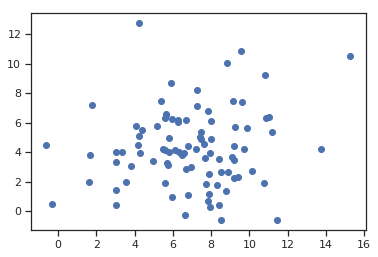

In [74]:
plt.scatter(ohnologs_goi['AS_WT_cont_mean_low'], ohnologs_goi['AS_WT_cont_mean_high'])

In [75]:
colors = {'low': 'blue', 'high': 'red'}

hover_text = []
for ind, row in ohnologs_goi.iterrows():
    hover_text.append(('Low Paralog: {SC_common_name_low}<br>  LFC: {LFC_low:.2f}<br>  -log10(pval): {pval_low:.2f}<br>' +
                       'High Paralog: {SC_common_name_high}<br>  LFC: {LFC_high:.2f}<br>  -log10(pval): {pval_high:.2f}').format(
                        SC_common_name_low = row['SC_common_name_low'],
                        LFC_low = row['log2FoldChange_low'],
                        pval_low = -np.log10(row['pvalue_low']),
                        SC_common_name_high = row['SC_common_name_high'],
                        LFC_high = row['log2FoldChange_high'],
                        pval_high = -np.log10(row['pvalue_high']))
                      )
data = []

for level in ['low','high']:
    trace = pygo.Scatter(
                x = ohnologs_goi['AS_WT_cont_mean_' + level], 
                y =  ohnologs_goi['AS_WT_drug_mean_' + level],
                text = hover_text,
                mode = 'markers',
                marker = {'opacity': 0.9,  
                          'color': colors[level],
                          'size': 10}, 
                name = level + ' induction paralogs'
            )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'rlog -drug'
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'rlog +drug'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'rlog_for_paralogs')

C:\Users\BMH_work\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



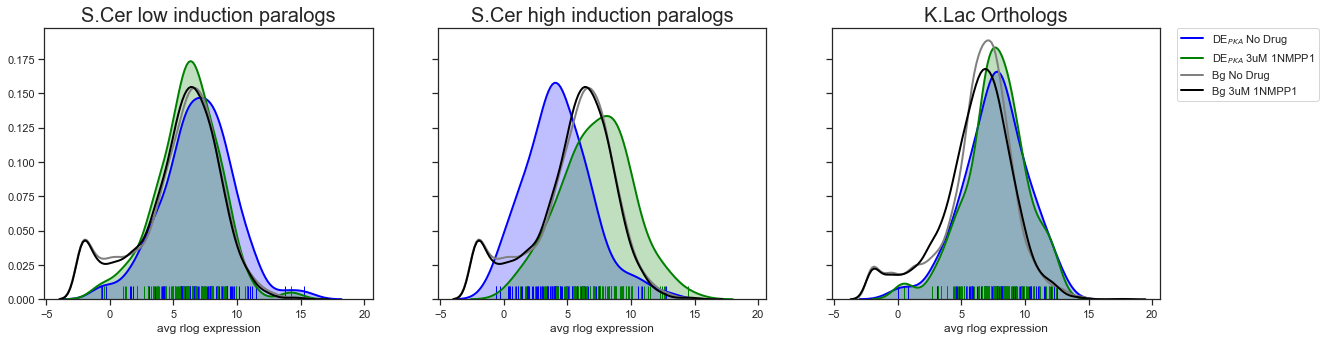

In [67]:
## Make Histograms (put dots on x axis)

fig, axarr = plt.subplots(1,3, sharex=True, sharey=True, figsize = [20,5])

level = 'low'

for jj, level in enumerate(['low','high']):
    ax = axarr[jj]
    sns.distplot(ohnologs_goi['AS_WT_cont_mean_' + level], hist=False, rug=True, ax=ax, 
                 rug_kws={"color": "blue"},
                 kde_kws={"color": "blue", "shade":True, "lw": 2, "label": "DE$_{PKA}$ No Drug"})
    sns.distplot(ohnologs_goi['AS_WT_drug_mean_' + level], hist=False, rug=True, ax=ax, 
                 rug_kws={"color": "green"},
                 kde_kws={"color": "green", "shade":True, "lw": 2, "label": "DE$_{PKA}$ 3uM 1NMPP1"})
    sns.distplot(rlog_data_mean_var['SC']['AS_WT_cont_mean'], hist=False, ax=ax,
                 kde_kws={"color": "grey",  "lw": 2, "label": "Bg No Drug"})
    sns.distplot(rlog_data_mean_var['SC']['AS_WT_drug_mean'], hist=False, ax=ax,
                 kde_kws={"color": "black",  "lw": 2, "label": "Bg 3uM 1NMPP1"})

    ax.get_legend().remove()
    ax.set_xlabel('avg rlog expression')
    ax.set_title('S.Cer ' + level + ' induction paralogs', fontsize = 20)



ax = axarr[2]
sns.distplot(ohnologs_goi_klorth_rlog['AS_WT_cont_mean'], hist=False, rug=True, ax=ax, 
             rug_kws={"color": "blue"},
             kde_kws={"color": "blue", "shade":True, "lw": 2, "label": "DE$_{PKA}$ No Drug"})
sns.distplot(ohnologs_goi_klorth_rlog['AS_WT_drug_mean'], hist=False, rug=True, ax=ax, 
             rug_kws={"color": "green"},
             kde_kws={"color": "green", "shade":True, "lw": 2, "label": "DE$_{PKA}$ 3uM 1NMPP1"})
sns.distplot(rlog_data_mean_var['KL']['AS_WT_cont_mean'], hist=False, ax=ax,
             kde_kws={"color": "grey",  "lw": 2, "label": "Bg No Drug"})
sns.distplot(rlog_data_mean_var['KL']['AS_WT_drug_mean'], hist=False, ax=ax,
             kde_kws={"color": "black",  "lw": 2, "label": "Bg 3uM 1NMPP1"})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('avg rlog expression')
ax.set_title('K.Lac Orthologs', fontsize = 20)



    
fig.savefig(os.path.normpath("C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/SC_KL_DEpka_induction_blue_green.svg"))  

    

Figure [rlog gois]:  K.Lactis orthologs of the WGH paralogs with differential induction in response to PKA inhibition tend to have constitutive and relatively high expression levels.  This is similar to the low-induction S.Cerevisiae WGH paralogs. Kernel density estimates for average rlog data for the indicated sets of gens are plotted with (green) and without (blue) treatment with 3uM NMPP1 (green).  Data is shown as ticks on the x axis.  The background for the S.Cer genes is all S.Cer genes, and for K.Lac orthologs is all K.Lac genes.  
Note: For the S.Cer genes there are 91 paralog pairs that meet my criteria for differential expression.  87 of those have K.Lac Orthologs

In [89]:
gtf_fname = "/home/heineike/genomes/scer_20181114/saccharomyces_cerevisiae_R64-2-2_20170117.gff"
db_fname = "/home/heineike/genomes/scer_20181114/saccharomyces_cerevisiae_R64-2-2_20170117.db"
db_created = True

if db_created: 
    db = gffutils.FeatureDB(db_fname)
else: 
    db = gffutils.create_db(gtf_fname, db_fname)

sc_features = pd.read_sql('select * from features;', db.conn)

sc_genes = sc_features[sc_features['featuretype']=='gene']

dubious_orfs = []
for row in sc_genes.iterrows():
    attributes = row[1]['attributes'].strip("{}").split(",")
    for attribute in attributes: 
        if attribute.split(":")[0]=='"orf_classification"':
            if attribute.split(":")[1]=='["Dubious"]':
                dubious_orfs.append(row[1]['id'])
print("There are {} dubious orfs in the saccharomyces_cerevisiae_R64-2-2_20170117.gff".format(len(dubious_orfs)))

There are 689 dubious orfs in the saccharomyces_cerevisiae_R64-2-2_20170117.gff


In [21]:
print('{} dubious orfs were removed from the rlog data set. {} total genes, {} in filtered set'.format(
     len(set(rlog_data_mean_var['SC'].index)&set(dubious_orfs)),
     len(rlog_data_mean_var['SC']), 
     len(rlog_data_mean_var_nodub)
     ))
      

443 dubious orfs were removed from the rlog data set. 6050 total genes, 5607 in filtered set


mean for DEpka high_cont: 4.32388195262562 +/- 2.6068221093000283
mean for all cont: 5.9085129147129285 +/- 2.9691054619586503
mean for DEpka high_drug: 7.254367534252784 +/- 2.7640825751623765
mean for all drug: 5.857474289744664 +/- 2.8801969399409355
mean for DEpka low_cont: 6.902454893033382 +/- 2.7654407953834874
mean for all cont: 5.9085129147129285 +/- 2.9691054619586503
mean for DEpka low_drug: 6.144416073263761 +/- 2.4879778794031955
mean for all drug: 5.857474289744664 +/- 2.8801969399409355
mean for DEpka orthologs cont: 7.653168776639845 +/- 2.488714472379547
mean for all cont: 6.28673704532881 +/- 2.9350454711880674
mean for DEpka orthologs drug: 7.6714658200689625 +/- 2.4123157534430923
mean for all drug: 6.1418350443894525 +/- 2.9541035134100135


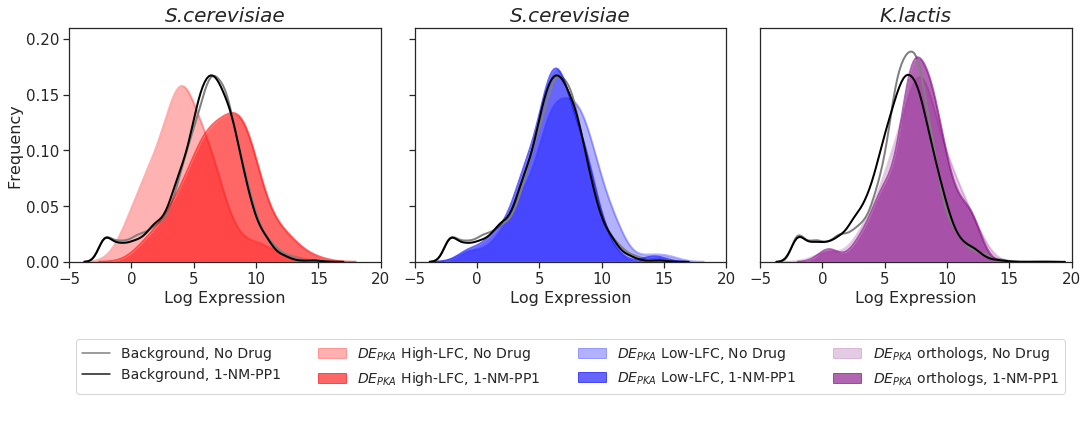

In [123]:
## Histograms:  Color coding/hatching, no dots. 

fig = plt.figure(constrained_layout=True, figsize=(15,6))
gs = fig.add_gridspec(2,3, width_ratios=[1,1,1], height_ratios = [5,2] )
#fig_pct, axarr = plt.subplots(1,3, figsize=(10,20), gridspec_kw={'width_ratios': [1, 20,1]})

axarr = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1]), fig.add_subplot(gs[0,2])]
ax_legend = fig.add_subplot(gs[1,:])

xmin = -5
xmax = 20
ymin = 0
ymax = 0.21
yticks = [0,0.05,0.10,0.15, 0.20]

#     ax_hmap = 
# ax_pct = fig_pct.add_subplot(gs[:,1])
# ax_cbar = fig_pct.add_subplot(gs[1,2])

#fig, axarr = plt.subplots(1,3, sharex=True, sharey=True, figsize = [20,5])

color_alpha = {'low_cont':('#0000ff',0.3),
              'low_drug':('#0000ff',0.6),
              'high_cont':('red',0.3), 
              'high_drug': ('red', 0.6) ,
              'klac_cont': ('purple', 0.2),
              'klac_drug': ('purple', 0.6)
             }
cond_labels = {'cont': 'No Drug', 'drug': '1-NM-PP1'}
level_titles = {'low': ('S.cerevisiae', '$DE_{PKA}$ Low-LFC'), 
                'high': ('S.cerevisiae', '$DE_{PKA}$ High-LFC')}
bg_colors = {'cont': 'grey', 'drug': 'black'}


legend_elements = [Line2D([0], [0], color='grey', label='Background, No Drug'),
                   Line2D([0], [0], color='k', label='Background, 1-NM-PP1')]

for jj, level in enumerate(['high', 'low']):
    ax = axarr[jj]
    for cond in ['cont','drug']:
        color , alpha = color_alpha[level + '_' + cond]
        rlog_data_mean_var_nodub = rlog_data_mean_var['SC'].loc[set(rlog_data_mean_var['SC'].index)-set(dubious_orfs),:]
        print("mean for DEpka {}: {} +/- {}".format(level+ '_' + cond,
                                               ohnologs_goi['AS_WT_' + cond + '_mean_' + level].mean(), 
                                               ohnologs_goi['AS_WT_' + cond + '_mean_' + level].std()
                                              ))
        print("mean for all {}: {} +/- {}".format(cond,
                                               rlog_data_mean_var_nodub['AS_WT_'+ cond +'_mean'].mean(), 
                                               rlog_data_mean_var_nodub['AS_WT_'+ cond +'_mean'].std()
                                              ))
        sns.distplot(ohnologs_goi['AS_WT_' + cond + '_mean_' + level], hist=False, rug=False, ax=ax, 
                    #rug_kws={"color": "blue"},
                    kde_kws={"color": color, "shade":True, "lw": 2, "alpha":alpha} )  #
        sns.distplot(rlog_data_mean_var_nodub['AS_WT_'+ cond +'_mean'], hist=False, ax=ax,
                     kde_kws={"color": bg_colors[cond],  "lw": 2})
        legend_elements.append(Patch(facecolor=color, alpha = alpha, edgecolor=color, label=level_titles[level][1] + ', ' + cond_labels[cond]) )
    
    ax.tick_params(labelsize = 15)
    ax.set_xlabel('Log Expression', fontsize=16)
    ax.set_title(level_titles[level][0], fontsize = 20, fontdict={'style':'italic'})
    ax.set_yticks(yticks)
    if jj==0:
        ax.set_yticklabels(['{:0.2f}'.format(ytick) for ytick in yticks])
        ax.set_ylabel('Frequency', fontsize=16)
    else:
        ax.set_yticklabels([])
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    #ax.legend().remove()
    #ax.legend(prop={'size':18})


    

level='klac'
ax = axarr[2]
for cond in ['cont','drug']:
    color , alpha = color_alpha[level + '_' + cond]
    print("mean for DEpka orthologs {}: {} +/- {}".format(cond,
                                           ohnologs_goi_klorth_rlog['AS_WT_' + cond + '_mean'].mean(), 
                                           ohnologs_goi_klorth_rlog['AS_WT_' + cond + '_mean'].std()
                                          ))
    print("mean for all {}: {} +/- {}".format(cond,
                                           rlog_data_mean_var['KL']['AS_WT_'+ cond +'_mean'].mean(), 
                                           rlog_data_mean_var['KL']['AS_WT_'+ cond +'_mean'].std()
                                          ))
    sns.distplot(ohnologs_goi_klorth_rlog['AS_WT_' + cond + '_mean'], hist=False, rug=False, ax=ax, 
        #rug_kws={"color": "blue"},
        kde_kws={"color": color, "shade":True, "lw": 2, "alpha":alpha }) # , "label": cond_labels[cond], })
    sns.distplot(rlog_data_mean_var['KL']['AS_WT_'+ cond +'_mean'], hist=False, ax=ax,
         kde_kws={"color": bg_colors[cond],  "lw": 2})
    legend_elements.append(Patch(facecolor=color, alpha = alpha, edgecolor=color, label='$DE_{PKA}$ orthologs, ' + cond_labels[cond]) )
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.legend().remove()
ax.set_xlabel('Log Expression', fontsize=16)
ax.tick_params(labelsize = 15)
ax.set_title('K.lactis', fontsize = 20, fontdict={'style':'italic'})
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])

#ax.legend(prop={'size':18})




# for 
#                    #       markerfacecolor='g', markersize=15),
#                    Patch(facecolor='red', alpha =0.45,  edgecolor='red',
#                          label='Ohnologs'), 
#                    Patch(facecolor='grey', alpha = 0.45, edgecolor='grey',
#                          label='Other genes') 
# #                    Patch(facecolor=act_rep_color, edgecolor=act_rep_color,
# #                          label='One ohnolog activated, one ohnolog repressed'), 
# #                    Patch(facecolor=no_eff_color, edgecolor=no_eff_color,
# #                          label='Not effected by PKA inhibition'), 
# #                    Patch(fill=False, edgecolor= 'grey', hatch = '///',
# #                          label='$DE_{PKA}$') 
#                     ]

#ax.legend(bbox_to_anchor=(1.05,1.0))
ax_legend.legend(handles=legend_elements, mode='expand', ncol=4, loc = 10, prop={'size':14})  #, bbox_to_anchor=(0.0, 1.3), loc=2, borderaxespad= 0.) #, loc='center')
ax_legend.set_axis_off()
    
fig.savefig(figsave_dir + 'SC_KL_DEpka_induction.svg')  

    

C:\Users\BMH_work\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0, 0.5, '')

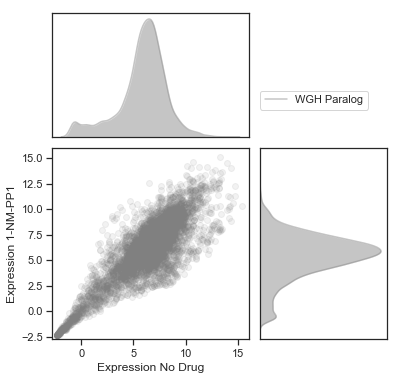

In [35]:
#seemed strange that there wasn't very much difference between +/- drug for S.Cer.  This checks it

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(5, 5, hspace=0.2, wspace=0.2)
ax_scatter = fig.add_subplot(grid[2:,0:-2])
ax_xhist = fig.add_subplot(grid[0:2,0:-2 ], xticks=[],yticks=[]) #, sharey=ax_scatter)
ax_yhist = fig.add_subplot(grid[2:,-2:], xticks=[],yticks=[]) #, sharex=ax_scatter)

# subsets = OrderedDict({'Not Wgh Paralog': (1,'gray', 0.2,0.45 ),
#                        'WGH Paralog': (2,'red', 0.2,0.45)
#                      })


#for subset_name, (N_paralogs, color, alpha, alpha_kde) in subsets.items(): 

alpha = 0.1
color = 'grey'
alpha_kde = 0.45
xdata = rlog_data_mean_var['KL']['AS_WT_cont_mean']
ydata = rlog_data_mean_var['KL']['AS_WT_drug_mean']   

ax_scatter.scatter(xdata, ydata, color=color, alpha=alpha)
sns.distplot(xdata, hist=False, rug=False, ax=ax_xhist, 
             kde_kws={"color": color, "shade":True,  "label": subset_name, "alpha": alpha_kde}) #"lw": 2,
sns.distplot(ydata, hist=False, rug=False, ax=ax_yhist, 
             kde_kws={"color": color, "shade":True, "label": subset_name, "alpha":alpha_kde}, vertical=True) #"lw": 2, 
    #ax_yhist.invert_xaxis()
#sns.jointplot(x = subset['log2FoldChange_KL'] , y = subset['log2FoldChange_SC'], kind='kde', color = color, ax = ax)
#     sns.distplot(subset['log2FoldChange_SC'], hist=False, rug=False, ax=ax, 
#                  kde_kws={"color": color, "shade":True, "lw": 2, "label": subset_name})
  
    
ax_scatter.set_xlim([-2.75,16])
ax_scatter.set_ylim([-2.75,16])
ax_scatter.set_xlabel('Expression No Drug')
ax_scatter.set_ylabel('Expression 1-NM-PP1')

ax_yhist.legend(bbox_to_anchor=(0.0, 1.3), loc=2, borderaxespad=0.)
kl_legend = ax_xhist.legend()
kl_legend.remove()
ax_xhist.set_xlabel('')
ax_yhist.set_ylabel('')


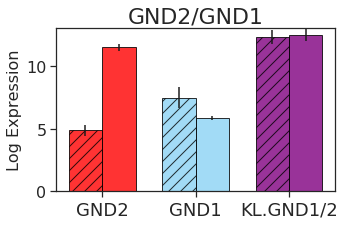

In [25]:
#Individual gene plot

high_gene = 'GND2'#'GPM2'#'YNR034W-A'  #   ENO1
legend_labels_dict = {'YNR034W-A': ['EGO4', 'EGO2', 'KL.EGO2/4'], 
                      'ENO1': ['ENO1', 'ENO2', 'KL.ENO1/2'],
                      'PYK2': ['PYK2', 'CDC19','KL.PYK'], 
                      'FMP43': ['MPC3', 'MPC2' , 'KL.MPC'], 
                      'GPM2': ['GPM2','GPM3','KL.GPM2/3'], 
                      'EMP46': ['EMP46','EMP47','KL.EMP46/47'], 
                      'GND2': ['GND2','GND1','KL.GND1/2']
                     }

row = ohnologs_goi_klorth_rlog[ohnologs_goi_klorth_rlog['SC_common_name_high']==high_gene]

fig_bar, ax_bar = plt.subplots(1,1, figsize=(5,3), sharex = True)
bw = 1.0
opacity = 0.8
spacing = 0.8

hatch_dict = OrderedDict([('cont','//'), ('drug','')])

plot_props_dict = OrderedDict([('high', ['AS_WT_','_high', 'red']),  #prefix, suffix, color
                               ('low', ['AS_WT_', '_low','#8bd3f4']),
                               ('kl', ['AS_WT_','', 'purple'])
                              ])

# for jj, quantity_to_view in enumerate(['pct', 'avg']):  
#     ax_bar = axs_bar[jj]
index = []
data = []
var = []
colors = []
hatches = []
tick_locs = []

for jj, (label, (prefix,suffix, color)) in enumerate(plot_props_dict.items()): 
    tick_locs.append(jj*(len(hatch_dict)+spacing) + 0.5)
    
    for kk, (cond, hatch) in enumerate(hatch_dict.items()):
        index.append(jj*(len(hatch_dict)+spacing) + kk)
        data.append(row[prefix + cond + '_mean' + suffix].values[0])
        var.append(np.sqrt(row[prefix + cond + '_var' + suffix].values[0]))
        hatches.append(hatch)
        colors.append(color)


bar_plot = ax_bar.bar(index,data, bw,
                     yerr = var,
                     alpha=opacity,
                     color=colors, 
                     edgecolor = 'black' 
#                      label=legend_labels[spec]
                    ) 

for kk, bar in enumerate(bar_plot):
    hatch = hatches[kk]
    bar.set_hatch(hatch)
#     bar_set = bar_sets[spec][kk]
#     plot_props[bar_set][3]=bar
#         bar_plots.append(bar_plot)
#         legend_label_list.append(legend_labels[spec]) 
    
    
#     ymax = max(data['Scer'] + data['Klac'] + [1.0]) + 0.2
#     ax_bar.vlines([len(index['Scer'])], ymin = 0, ymax = ymax, colors = 'gray',linewidth=3)
ax_bar.set_xticklabels(legend_labels_dict[high_gene], fontsize=18)
#ax_bar.set_xticklabels(list(plot_props_dict.keys()))
ax_bar.set_xticks(tick_locs)
ax_bar.tick_params(axis='y', labelsize=16)
ax_bar.set_title(legend_labels_dict[high_gene][0] + '/'+legend_labels_dict[high_gene][1], fontsize = 22)
ax_bar.set_ylabel('Log Expression', fontsize=16)
ax_bar.set_ylim([0,13])


#remember to move figure to laptop
fig_bar.savefig(os.path.normpath(figsave_dir + 'mydata_' + high_gene +'.svg'))


In [30]:
row.columns
#row['AS_WT_cont_mean_low']
row['AS_WT_cont_var_low']

25    0.866678
Name: AS_WT_cont_var_low, dtype: float64

In [ ]:
LFC and standard error from cross_species_compare_ASminus_ASplus_YPD_20181204
Rlog taken from ohnologs_goi_klorth_rlog in this file
Msn2/4 del data taken from 20181017_deseq_SC_AS_M24_nmpp1

EGO2:0.41+/-0.37
low: 6.09+/-0.12
EGO4:7.16+/-0.38
    4.12+/-0.04
    Msn2/4 del 1.45+/-0.6
KLEGO2/4: 1.06 +/-0.29

GPM3: -0.26 +/-0.75
    3.79 +/- 0.87
GPM2: 5.16 +/-0.52
    3.02 +/- 0.34
KLGPM2/3: 2.36+/-0.33
    
GND2: 7.77+/-0.40
GND1: -2.40+/-0.52
KLGND1/2: 0.17+/-0.38

In [13]:
row.columns

Index(['Ancestor', 'AA %id', 'Length Ratio', 'sc_genename_low',
       'SC_common_name_low', 'log2FoldChange_low', 'pvalue_low',
       'AS_WT_drug_mean_low', 'AS_WT_drug_var_low', 'AS_WT_cont_mean_low',
       'AS_WT_cont_var_low', 'sc_genename_high', 'SC_common_name_high',
       'log2FoldChange_high', 'pvalue_high', 'AS_WT_drug_mean_high',
       'AS_WT_drug_var_high', 'AS_WT_cont_mean_high', 'AS_WT_cont_var_high',
       'N SCer Orthologs', 'kl_genename', 'sc_genename', 'AS_M24_cont_mean',
       'AS_M24_drug_mean', 'AS_RGM24_cont_mean', 'AS_RGM24_drug_mean',
       'AS_RG_cont_mean', 'AS_RG_drug_mean', 'AS_WT_cont_mean',
       'AS_WT_drug_mean', 'WT_WT_cont_mean', 'WT_WT_drug_mean',
       'AS_M24_cont_var', 'AS_M24_drug_var', 'AS_RGM24_cont_var',
       'AS_RGM24_drug_var', 'AS_RG_cont_var', 'AS_RG_drug_var',
       'AS_WT_cont_var', 'AS_WT_drug_var', 'WT_WT_cont_var', 'WT_WT_drug_var',
       'SC_common_name'],
      dtype='object')

In [102]:
kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name']=='PYK2']

,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,baseMean_SC,log2FoldChange_SC,lfcSE_SC,stat_SC,pvalue_SC,padj_SC,SC_common_name
4389,2,KLLA0F23397g,YOR347C,494.180208,-1.707789,0.996148,-1.714394,0.086456,0.142569,47.344838,2.432765,0.566851,4.291719,0.000018,0.000069,PYK2


In [ ]:
#Heatmaps for LFC and rlog

In [125]:
#Merge k.lac data with ohnolog_gois but leave blanks for missing data from KL
ohnologs_goi_klorth_left = ohnologs_goi.merge(kl_orthologs, how='left', left_on='sc_genename_low',right_on='sc_genename')
ohnologs_goi_klorth_rlog_left = ohnologs_goi_klorth_left.merge(rlog_data_mean_var['KL'], how = 'left', left_on='kl_genename', right_index = True)
#Merge LFC data from KL with rest of ohnolog data
ohnologs_goi_kl_data_left = ohnologs_goi_klorth_rlog_left.merge(kl_sc_PKA_data.loc[:,
                    ['N SCer Orthologs', 'kl_genename', 'sc_genename', 'baseMean_KL',
                    'log2FoldChange_KL', 'lfcSE_KL', 'stat_KL', 'pvalue_KL', 'padj_KL']],
                    how='left', left_on = 'sc_genename_high', right_on = 'sc_genename')  


#Sort by LFC high
ohnologs_goi_kl_data_left.sort_values(by='log2FoldChange_high', ascending=False, inplace=True)
ohnologs_goi_kl_data_left['SC_common_name_high_low'] = ohnologs_goi_kl_data_left['SC_common_name_high'] + '_' + ohnologs_goi_kl_data_left['SC_common_name_low']
ohnologs_goi_kl_data_left.set_index('SC_common_name_high_low', inplace=True)


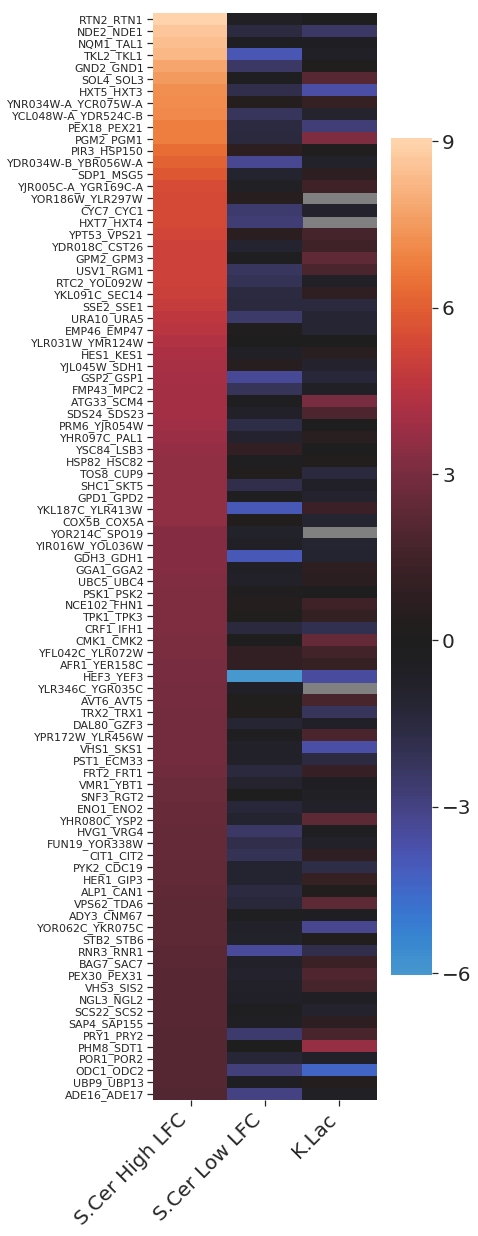

In [85]:
## Using same order and column names, visualize my rlog data

lfc_sc_kl = ohnologs_goi_kl_data_left.loc[:, ['log2FoldChange_high', 'log2FoldChange_low', 'log2FoldChange_KL']]

fig_lfc, ax_lfc = plt.subplots(figsize=(5,20))

sns.heatmap(lfc_sc_kl, center = 0.0, ax=ax_lfc)

ax_lfc.set_facecolor("grey")
ax_lfc.set_xticklabels(['S.Cer High LFC', 'S.Cer Low LFC', 'K.Lac'], fontdict={'fontsize':20, 'rotation':45, 'horizontalalignment':'right'})
ax_lfc.set_ylabel('')

cbar = ax_lfc.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)



fig_lfc.savefig(figsave_dir + 'LFC_goi.svg')

[Text(0.5,0,'SCer low'), Text(1.5,0,'SCer high'), Text(2.5,0,'KLac')]

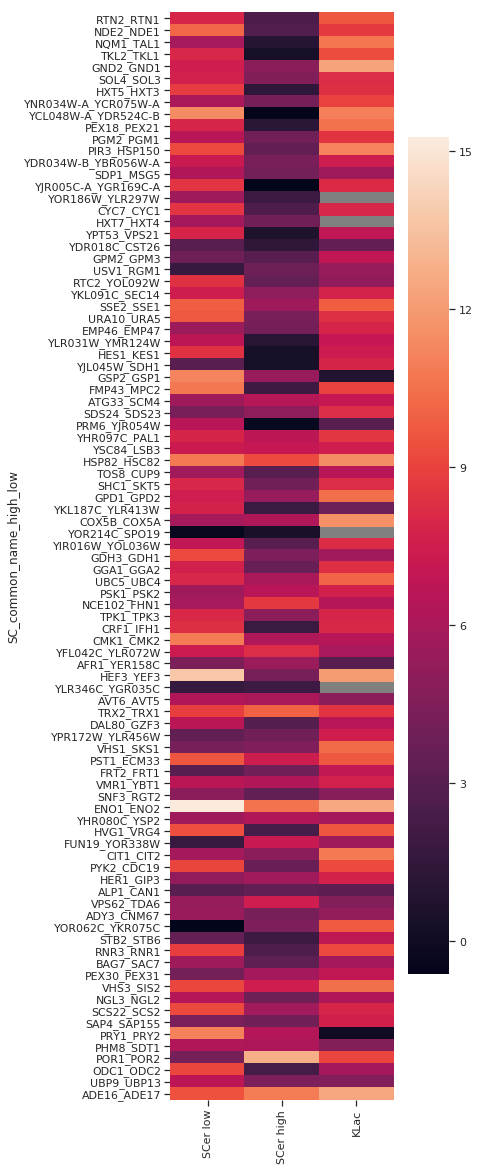

In [26]:
rlog_sorted = ohnologs_goi_kl_data_left.loc[:,['AS_WT_cont_mean_low', 'AS_WT_cont_mean_high', 'AS_WT_cont_mean']]

fig_rlog, ax_rlog = plt.subplots(figsize=(5,20))

sns.heatmap(rlog_sorted,ax=ax_rlog)

ax_rlog.set_facecolor("grey")
ax_rlog.set_xticklabels(['SCer low', 'SCer high', 'KLac'])

fig_rlog.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/rlog_goi.svg'))

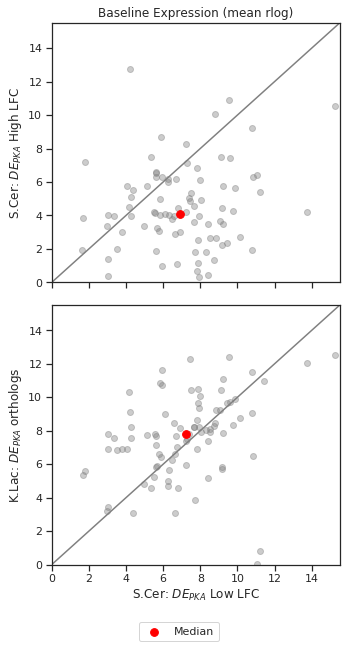

In [140]:
## Plot Scatter of rLog low/high, low, K.lac
fig, axarr = plt.subplots(2,1, figsize=(5,9)) 

level_titles = {'low': 'S.Cer: $DE_{PKA}$ Low LFC paralogs', 
                'high': 'S.Cer: $DE_{PKA}$ High LFC paralogs'}

#(axis_label, column)
data_info = {'high':  ('S.Cer: $DE_{PKA}$ High LFC','AS_WT_cont_mean_high') , 
             'low' :  ('S.Cer: $DE_{PKA}$ Low LFC', 'AS_WT_cont_mean_low') , 
             'kl'  :  ('K.Lac: $DE_{PKA}$ orthologs', 'AS_WT_cont_mean')}

(xdata_label, xdata_column) = data_info['low']

xmin, xmax = (0,15.5)

for jj, ydata_id in enumerate(['high', 'kl']):

    ax = axarr[jj]
    (ydata_label, ydata_column) = data_info[ydata_id]  
    
    xdata_raw = ohnologs_goi_kl_data_left[xdata_column]
    ydata_raw = ohnologs_goi_kl_data_left[ydata_column]
    
    xdata = xdata_raw[~np.isnan(ydata_raw)]
    ydata = ydata_raw[~np.isnan(ydata_raw)]
    
    ax.scatter(xdata, ydata, color='grey', alpha = 0.4, label = '_nolegend_')
    ax.plot([xmin,xmax],[ymin,ymax], color = 'grey')
    
    ax.scatter(np.median(xdata), np.median(ydata), color='red', s = 60, label = 'Median')
#     slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
#     print('regression for slope : {0:.2f}, intercept: {1:.2f}, R: {2:.2f}'.format(slope,intercept,r_value))
    
#     ax.plot([xmin,xmax],np.array([xmin, xmax])*slope + intercept, color = 'blue', linestyle = '--')
    
    ax.set_xlim([0,15.5])
    ax.set_ylim([0,15.5])
    ax.set_ylabel(ydata_label)
    if jj==0:
        ax.set_title('Baseline Expression (mean rlog)')
        ax.set_xticklabels([])
    if jj==1:
        ax.legend(bbox_to_anchor = (0.6, -0.2))
        ax.set_xlabel(xdata_label)
    

#fig.subplots_adjust(hspace=0.3)
fig.tight_layout()

fig.savefig(figsave_dir + 'rlog_comparison.svg')

In [141]:
ohnologs_goi_kl_data_left

,Ancestor,AA %id,Length Ratio,sc_genename_low,SC_common_name_low,log2FoldChange_low,pvalue_low,AS_WT_drug_mean_low,AS_WT_drug_var_low,AS_WT_cont_mean_low,...,SC_common_name,N SCer Orthologs_y,kl_genename_y,sc_genename_y,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL
SC_common_name_high_low,,,,,,,,,,,,,,,,,,,,,
RTN2_RTN1,Anc_8.454,25%,0.75,YDR233C,RTN1,-0.499323,3.657777e-01,7.498897,0.564387,7.892480,...,RTN2_RTN1,2.0,KLLA0C15081g,YDL204W,623.799602,-0.108495,0.329596,-0.329175,7.420234e-01,8.121857e-01
NDE2_NDE1,Anc_2.382,57%,0.97,YMR145C,NDE1,-1.545259,1.954957e-08,8.919748,0.014281,10.143253,...,NDE2_NDE1,2.0,KLLA0E21891g,YDL085W,242.626003,-2.431900,0.443448,-5.484065,4.156612e-08,2.115254e-07
NQM1_TAL1,Anc_4.188,68%,0.99,YLR354C,TAL1,-0.353508,6.356106e-01,6.091445,0.510327,5.945874,...,NQM1_TAL1,2.0,KLLA0A02607g,YGR043C,1169.743754,-0.435606,0.313071,-1.391398,1.641048e-01,2.439570e-01
TKL2_TKL1,Anc_3.372,71%,1.00,YPR074C,TKL1,-3.878108,1.499922e-03,4.916410,1.411789,7.942811,...,TKL2_TKL1,2.0,KLLA0B09152g,YBR117C,433.053340,-0.610953,0.288087,-2.120722,3.394519e-02,6.290968e-02
GND2_GND1,Anc_5.55,87%,0.99,YHR183W,GND1,-2.396217,4.987727e-06,5.825615,0.028369,7.466869,...,GND2_GND1,2.0,KLLA0A09339g,YGR256W,4602.776485,0.178656,0.384208,0.464999,6.419324e-01,7.320754e-01
SOL4_SOL3,Anc_5.78,48%,0.98,YHR163W,SOL3,-0.255415,5.562482e-01,7.391484,0.367209,7.642824,...,SOL4_SOL3,2.0,KLLA0A05390g,YGR248W,608.907967,2.141631,0.326168,6.566034,5.167293e-11,3.687823e-10
HXT5_HXT3,Anc_5.396,70%,0.96,YDR345C,HXT3,-1.782263,2.252934e-08,7.364999,0.045791,8.756288,...,HXT5_HXT3,2.0,KLLA0D13310g,YHR096C,172.816384,-3.627256,0.469450,-7.726613,1.104458e-14,1.116541e-13
YNR034W-A_YCR075W-A,Anc_6.348,18%,0.77,YCR075W-A,YCR075W-A,0.413182,2.677440e-01,6.461917,0.045211,6.091040,...,EGO4_EGO2,2.0,KLLA0F27390g,YNR034W-A,614.098699,1.058296,0.291552,3.629869,2.835648e-04,8.578609e-04
YCL048W-A_YDR524C-B,Anc_1.22,48%,0.84,YDR524C-B,YDR524C-B,-2.265164,4.594696e-15,9.657054,0.046498,11.454176,...,YDR524C-B_YCL048W-A,2.0,KLLA0C00957g,YCL048W-A,1335.975339,-0.932691,0.309348,-3.015022,2.569610e-03,6.441758e-03


In [146]:
#Compare Msn2/4 activation targets across species

y_data = 'kl' #'high'

#(axis_label, column)
data_info = {'high':  ('S.Cer: $DE_{PKA}$ High LFC','AS_WT_cont_mean_high') , 
             'low' :  ('S.Cer: $DE_{PKA}$ Low LFC', 'AS_WT_cont_mean_low') , 
             'kl'  :  ('K.Lac: $DE_{PKA}$ orthologs', 'AS_WT_cont_mean')}

(xdata_label, xdata_column) = data_info['low']
(ydata_label, ydata_column) = data_info[y_data]

xdata_raw = ohnologs_goi_kl_data_left[xdata_column]
ydata_raw = ohnologs_goi_kl_data_left[ydata_column]



data = []

# xlabel = 'LFC AS -/+ K.Lac'
# ylabel = 'LFC AS -/+ S.Cer'

# sc_target_set = set(msn24_sets['SC'][msn2_level]) 
# kl_target_set = set(kl_sc_PKA_data.loc[kl_sc_PKA_data['kl_genename'].isin(msn24_sets['KL'][msn2_level]),'sc_genename'])

# gene_subset = { 'Neither': set(kl_sc_PKA_data['sc_genename']) - (sc_target_set | kl_target_set),
#                 'KL only': kl_target_set-sc_target_set, 
#                 'SC only': sc_target_set-kl_target_set, 
#                 'Both': sc_target_set & kl_target_set
#                }
               
# colors = {'KL only':'blue', 
#           'SC only':'orange', 
#           'Both': 'purple', 
#           'Neither': 'gray'}

# for geneset_name, geneset in gene_subset.items():
    
#     kl_sc_PKA_data_subset = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(geneset)]
    
#     opacity = 0.8
#     if geneset_name == 'Neither':
#         opacity = 0.3
    
trace = pygo.Scatter(
            x = xdata_raw, 
            y =  ydata_raw,
            text = ohnologs_goi_kl_data_left.index,
            mode = 'markers',
#             marker = {'opacity': opacity,  
#                       'color': colors[geneset_name],
#                       'size': 10}, 
            name = 'Low v.s. ' + y_data
        )

data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'Low'
    },
    yaxis= {
        #"range":[-10, 10],
        "title": y_data
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'rlog_DEPKA_low_vs_' + y_data)

## PKA, Msn24, and Rgm1/Gis1 targets

In [7]:
# Load gene lists from both species

gene_sets = {}

for spec in ['SC','KL']:
    fname = os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181203_r1g1_m24_pka_targets_' + spec + '.pkl')   #20181128_r1g1_m24_pka_targets_' + spec + '_high_thresh.pkl')
    with open(fname, 'rb') as file:
        data = pickle.load(file)
        gene_set = data[0]
        gene_sets[spec] = gene_set


#NOTE: For M24 sets there might be a more recent set - 20190319
msn24_sets = {}

for spec in ['SC','KL']:
    fname = os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181128_m24_pka_targets_vary_slope_' + spec + '.pkl')
    with open(fname, 'rb') as file:
        msn24_sets[spec] = pickle.load(file)
        

In [6]:
#Compare Msn2/4 activation targets across species

data = []

msn2_level = 'M_75'
#target_set = 'm24_nmpp1_act'

xlabel = 'LFC AS -/+ K.Lac'
ylabel = 'LFC AS -/+ S.Cer'

sc_target_set = set(msn24_sets['SC'][msn2_level]) 
kl_target_set = set(kl_sc_PKA_data.loc[kl_sc_PKA_data['kl_genename'].isin(msn24_sets['KL'][msn2_level]),'sc_genename'])

gene_subset = { 'Neither': set(kl_sc_PKA_data['sc_genename']) - (sc_target_set | kl_target_set),
                'KL only': kl_target_set-sc_target_set, 
                'SC only': sc_target_set-kl_target_set, 
                'Both': sc_target_set & kl_target_set
               }
               
colors = {'KL only':'blue', 
          'SC only':'orange', 
          'Both': 'purple', 
          'Neither': 'gray'}

for geneset_name, geneset in gene_subset.items():
    
    kl_sc_PKA_data_subset = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(geneset)]
    
    opacity = 0.8
    if geneset_name == 'Neither':
        opacity = 0.3
    
    trace = pygo.Scatter(
                x = kl_sc_PKA_data_subset['log2FoldChange_KL'], 
                y =  kl_sc_PKA_data_subset['log2FoldChange_SC'],
                text = kl_sc_PKA_data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': opacity,  
                          'color': colors[geneset_name],
                          'size': 10}, 
                name = geneset_name
            )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'AS_pmNMPP1_kl_v_sc_' + msn2_level)

In [7]:
data = []

target_set = 'r1g1_rep'

xlabel = 'LFC AS -/+ K.Lac'
ylabel = 'LFC AS -/+ S.Cer'

sc_target_set = gene_sets['SC'][target_set]
kl_target_set = set(kl_sc_PKA_data.loc[kl_sc_PKA_data['kl_genename'].isin(gene_sets['KL'][target_set]),'sc_genename'])

gene_subset = { 'Neither': set(kl_sc_PKA_data['sc_genename']) - (sc_target_set | kl_target_set),
                'KL only': kl_target_set-sc_target_set, 
                'SC only': sc_target_set-kl_target_set, 
                'Both': sc_target_set & kl_target_set
               }
               
colors = {'KL only':'blue', 
          'SC only':'orange', 
          'Both': 'purple', 
          'Neither': 'gray'}

for geneset_name, geneset in gene_subset.items():
    
    kl_sc_PKA_data_subset = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(geneset)]
    
    opacity = 0.8
    if geneset_name == 'Neither':
        opacity = 0.3
    
    trace = pygo.Scatter(
                x = kl_sc_PKA_data_subset['log2FoldChange_KL'], 
                y =  kl_sc_PKA_data_subset['log2FoldChange_SC'],
                text = kl_sc_PKA_data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': opacity,  
                          'color': colors[geneset_name],
                          'size': 10}, 
                name = geneset_name
            )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'AS_pmNMPP1_kl_v_sc_' + target_set)

In [15]:
gene_subset['Msn2/4 only']

{'EBG00000981576',
 'EBG00000981954',
 'EBG00000982249',
 'EBG00000982282',
 'KLLA0A00506g',
 'KLLA0A01221g',
 'KLLA0A02387g',
 'KLLA0A02629g',
 'KLLA0A02717g',
 'KLLA0A04081g',
 'KLLA0A04125g',
 'KLLA0A05852g',
 'KLLA0A09229g',
 'KLLA0A10527g',
 'KLLA0A11209g',
 'KLLA0B00803g',
 'KLLA0B04422g',
 'KLLA0B04543g',
 'KLLA0B04620g',
 'KLLA0B08800g',
 'KLLA0B09482g',
 'KLLA0B09526g',
 'KLLA0B09878g',
 'KLLA0B10263g',
 'KLLA0B11770g',
 'KLLA0B11792g',
 'KLLA0B12540g',
 'KLLA0B12672g',
 'KLLA0B12694g',
 'KLLA0B12760g',
 'KLLA0B12892g',
 'KLLA0B13123g',
 'KLLA0B14234g',
 'KLLA0B14751g',
 'KLLA0C01001g',
 'KLLA0C01177g',
 'KLLA0C02035g',
 'KLLA0C02937g',
 'KLLA0C04686g',
 'KLLA0C05324g',
 'KLLA0C05456g',
 'KLLA0C05940g',
 'KLLA0C06006g',
 'KLLA0C06072g',
 'KLLA0C08679g',
 'KLLA0C08888g',
 'KLLA0C10505g',
 'KLLA0C16027g',
 'KLLA0C16269g',
 'KLLA0C16489g',
 'KLLA0C17160g',
 'KLLA0C17886r',
 'KLLA0C17963g',
 'KLLA0C18117g',
 'KLLA0C18722g',
 'KLLA0C18909g',
 'KLLA0C19085g',
 'KLLA0C19132g',
 'KLLA

In [16]:
data = []

spec = 'KL'

msn2_level = 'M_75'

r1g1_rep_genes = gene_sets[spec]['r1g1_rep']
m24_nmpp1_act_genes = set(msn24_sets[spec][msn2_level])

xlabel = 'LFC AS -/+ K.Lac'
ylabel = 'LFC AS -/+ S.Cer'

gene_subset = { 'Neither': set(kl_sc_PKA_data[spec.lower() + '_genename']) - (r1g1_rep_genes | m24_nmpp1_act_genes),
                'Rph1/Gis1 only': r1g1_rep_genes - m24_nmpp1_act_genes, 
                'Msn2/4 only': m24_nmpp1_act_genes - r1g1_rep_genes, 
                'Both': r1g1_rep_genes & m24_nmpp1_act_genes
               }
               
colors = {'Rph1/Gis1 only':'blue', 
          'Msn2/4 only':'red', 
          'Both': 'green', 
          'Neither': 'gray'}

for geneset_name, geneset in gene_subset.items():
    
    kl_sc_PKA_data_subset = kl_sc_PKA_data[kl_sc_PKA_data[spec.lower() + '_genename'].isin(geneset)]
    
    opacity = 0.8
    if geneset_name == 'Neither':
        opacity = 0.3
    
    trace = pygo.Scatter(
                x = kl_sc_PKA_data_subset['log2FoldChange_KL'], 
                y =  kl_sc_PKA_data_subset['log2FoldChange_SC'],
                text = kl_sc_PKA_data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': opacity,  
                          'color': colors[geneset_name],
                          'size': 10}, 
                name = geneset_name
            )

    data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'AS_pmNMPP1_kl_v_sc_' + spec + '_r1g1_m24_'+msn2_level)

In [18]:
kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name']=='GPA1']

,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,baseMean_SC,log2FoldChange_SC,lfcSE_SC,stat_SC,pvalue_SC,padj_SC,SC_common_name
3238,1,KLLA0F25916g,YHR005C,488.455583,7.399321,0.55758,13.270415,3.436744e-40,2.080613e-38,122.072697,-0.346963,0.364511,-0.951858,0.341169,0.463977,GPA1


In [4]:
# #Not sure what this list of genes is for

# precursor = ['NDE2', 'GAC1', 'YJL045W', 'GLG1', 'GSM1', 'COX5B', 'COX20', 'CYC7', 'MBR1', 'GDB1', 'LSC2', 'AAC1', 'GSY2', 'PIG2', 'NDI1', 'RSF1', 'SHH4', 'SDH5', 'YLR345W', 'GSY1', 'ISF1', 'NCA2', 'GIP2', 'TDH1', 'MIX14', 'PSK1', 'SDH2', 'CIT1', 'ENO1', 'YMR31', 'RGI1', 'RGI2', 'YPI1', 'GLG2']
# resp = ['SHH4', 'MBR1', 'NDI1', 'SDH5', 'LSC2', 'SDH2', 'CIT1', 'YJL045W', 'AAC1', 'COX5B', 'YMR31', 'MIX14', 'ISF1', 'NCA2', 'COX20', 'CYC7', 'RSF1']
# set(precursor) - set(resp)
# #set(resp) - set(precursor)
